# Ressouces

In [1]:
                  # TECHNIQUE DE SMOTE #
# https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/    

                  # SHAPE VALUES #
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20XGBoost.html
# https://www.kdnuggets.com/2022/03/build-machine-learning-web-app-5-minutes.html
# https://explainerdashboard.readthedocs.io/en/latest/

                  # SEUIL ET METRIQUE FBETE_SCORE #
# https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
# https://machinelearningmastery.com/imbalanced-classification-of-good-and-bad-credit/
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html

                 # TABLEAU DE BORDS #
# https://rishabhrahatgaonkar.medium.com/ml-model-deployment-using-flask-6bd6c0e591e4   
# https://medium.com/@agulyamova/deploying-classification-model-with-flask-1a694d3534a2
# https://pub.towardsai.net/practical-guide-build-and-deploy-a-machine-learning-web-app-c6760f877fb
# https://www.youtube.com/watch?v=ZgypAMRcmw8

               # NOTEBOOK KADDLE
# https://www.kaggle.com/code/megannichols/team-3-final-eda-notebook-1/notebook
# https://www.kaggle.com/code/cloycebox/team-3-model-notebook/notebook

# Les packages

In [2]:
# outils Python standards
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# étapes de prétraitement
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

# modèles et outils d'apprentissage automatique
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import plot_importance

# validation croisée et métriques 
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as me
from sklearn.metrics import fbeta_score

# Resample
from collections import Counter
from imblearn.over_sampling import SMOTE
#from sklearn.metrics.pairwise import euclidean_distances


import time
start_time = time.time()

pd.options.display.max_rows = 999
import warnings
warnings.filterwarnings('ignore')

# Importation des données

In [3]:
# lecture des données finales pour le modèle train final
TRAIN_FINAL = pd.read_csv('TRAIN_FINAL_DATASET.csv')


#  lecture des données finales pour le modèle test final base client
TEST_FINAL = pd.read_csv("TEST_FINAL_DATASET.csv")

In [4]:
# Dataset final
pd.set_option("display.max_column",89)
TRAIN_FINAL.head(5)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   1            0             0   
1      100003       0                   1            1             0   
2      100004       0                   0            0             1   
3      100006       0                   1            1             0   
4      100007       0                   1            0             0   

   FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1          202500.0    406597.5      24700.5   
1                0          270000.0   1293502.5      35698.5   
2                1           67500.0    135000.0       6750.0   
3                1          135000.0    312682.5      29686.5   
4                1          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801        9461         -637.0   
1        1129500.0                    0.003541       16765        -1188.0   
2         135000.0                    0.010032       19046         -225.0   
3         297000.0                    0.008019       19005        -3039.0   
4         513000.0                    0.028663       19932        -3038.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  \
0            -3648.0            -2120          9.0               1   
1            -1186.0             -291          9.0               1   
2            -4260.0            -2531         26.0               1   
3            -9833.0            -2437          9.0               1   
4            -4311.0            -3458          9.0               1   

   FLAG_WORK_PHONE  FLAG_PHONE  REGION_RATING_CLIENT  \
0                0           1                     2   
1                0           1                     1   
2                1           1                     2   
3                0           0                     2   
4                0           0                     2   

   REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                            2                       10   
1                            1                       11   
2                            2                        9   
3                            2                       17   
4                            2                       11   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  \
0      0.083037      0.262949      0.139376                       0.9722   
1      0.311267      0.622246      0.535276                       0.9851   
2      0.505998      0.555912      0.729567                       0.9816   
3      0.505998      0.650442      0.535276                       0.9816   
4      0.505998      0.322738      0.535276                       0.9816   

   DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  FLAG_DOCUMENT_6  \
0                 -1134.0                1                0   
1                  -828.0                1                0   
2                  -815.0                0                0   
3                  -617.0                1                0   
4                 -1106.0                0                0   

   DAYS_EMPLOYED_ANOM  DAYS_EMPLOYED_PERCENT  INCOME_CREDIT_PER  \
0                   0              -0.067329           0.498036   
1                   0              -0.070862           0.208736   
2                   0              -0.011814           0.500000   
3                   0         

In [5]:
TRAIN_FINAL.shape

(305539, 92)

In [6]:
# Dataset final
pd.set_option("display.max_column",89)
TEST_FINAL.head(5)

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100001                   1            1             0                1   
1      100005                   1            0             0                1   
2      100028                   1            1             0                1   
3      100038                   1            0             1                0   
4      100042                   1            1             1                1   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          135000.0    568800.0      20560.5         450000.0   
1           99000.0    222768.0      17370.0         180000.0   
2          315000.0   1575000.0      49018.5        1575000.0   
3          180000.0    625500.0      32067.0         625500.0   
4          270000.0    959688.0      34600.5         810000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018850       19241        -2329.0            -5170.0   
1                    0.035792       18064        -4469.0            -9118.0   
2                    0.026392       13976        -1866.0            -2000.0   
3                    0.010032       13040        -2191.0            -4000.0   
4                    0.025164       18604       -12009.0            -6116.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  \
0             -812          9.0               1                0           0   
1            -1623          9.0               1                0           0   
2            -4208          9.0               1                0           1   
3            -4262         16.0               1                1           0   
4            -2027         10.0               1                0           1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       18   
1                     2                            2                        9   
2                     2                            2                       11   
3                     2                            2                        5   
4                     2                            2                       15   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       1                        1   
4                       0                       0                        0   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  \
0      0.752614      0.789654      0.159520                       0.9732   
1      0.564990      0.291656      0.432962                       0.9816   
2      0.525734      0.509677      0.612704                       0.9970   
3      0.202145      0.425687      0.519097                       0.9816   
4      0.506442      0.628904      0.392774                       0.9821   

   DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  FLAG_DOCUMENT_6  \
0                 -1740.0                1                0   
1                     0.0                1                0   
2                 -1805.0                1                0   
3                  -821.0                1                0   
4                 -1705.0                0                0   

   DAYS_EMPLOYED_ANOM  DAYS_EMPLOYED_PERCENT  INCOME_CREDIT_PER  \
0                   0              -0.121044           0.237342   
1                   0              -0.247398           0.444409   
2                   0              -0.133515           0.200000   
3                   0              -0.168021           0.287770   
4                   0              -0.6455

In [7]:
TEST_FINAL.shape

(47801, 91)

# Préparation des données pour la modélisation

In [8]:
# Features
X = TRAIN_FINAL.drop(columns=['TARGET'], axis = 1)

# Variable cible
y = TRAIN_FINAL['TARGET']

In [9]:
y = y.reset_index(drop=True)
X=X.reset_index(drop=True)

In [10]:
X.head(5)

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002                   1            0             0                1   
1      100003                   1            1             0                0   
2      100004                   0            0             1                1   
3      100006                   1            1             0                1   
4      100007                   1            0             0                1   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461         -637.0            -3648.0   
1                    0.003541       16765        -1188.0            -1186.0   
2                    0.010032       19046         -225.0            -4260.0   
3                    0.008019       19005        -3039.0            -9833.0   
4                    0.028663       19932        -3038.0            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  \
0            -2120          9.0               1                0           1   
1             -291          9.0               1                0           1   
2            -2531         26.0               1                1           1   
3            -2437          9.0               1                0           0   
4            -3458          9.0               1                0           0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  \
0      0.083037      0.262949      0.139376                       0.9722   
1      0.311267      0.622246      0.535276                       0.9851   
2      0.505998      0.555912      0.729567                       0.9816   
3      0.505998      0.650442      0.535276                       0.9816   
4      0.505998      0.322738      0.535276                       0.9816   

   DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  FLAG_DOCUMENT_6  \
0                 -1134.0                1                0   
1                  -828.0                1                0   
2                  -815.0                0                0   
3                  -617.0                1                0   
4                 -1106.0                0                0   

   DAYS_EMPLOYED_ANOM  DAYS_EMPLOYED_PERCENT  INCOME_CREDIT_PER  \
0                   0              -0.067329           0.498036   
1                   0              -0.070862           0.208736   
2                   0              -0.011814           0.500000   
3                   0              -0.159905           0.431748   
4                   0              -0.1524

In [11]:
# alignement des deux tables (par colonne) pour que les deux dataframes aient le même configuration
X, TEST_FINAL = X.align(TEST_FINAL, join = 'inner', axis=1)

In [12]:
TEST_FINAL.shape

(47801, 91)

In [13]:
TEST_FINAL.head(5)

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100001                   1            1             0                1   
1      100005                   1            0             0                1   
2      100028                   1            1             0                1   
3      100038                   1            0             1                0   
4      100042                   1            1             1                1   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          135000.0    568800.0      20560.5         450000.0   
1           99000.0    222768.0      17370.0         180000.0   
2          315000.0   1575000.0      49018.5        1575000.0   
3          180000.0    625500.0      32067.0         625500.0   
4          270000.0    959688.0      34600.5         810000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018850       19241        -2329.0            -5170.0   
1                    0.035792       18064        -4469.0            -9118.0   
2                    0.026392       13976        -1866.0            -2000.0   
3                    0.010032       13040        -2191.0            -4000.0   
4                    0.025164       18604       -12009.0            -6116.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  \
0             -812          9.0               1                0           0   
1            -1623          9.0               1                0           0   
2            -4208          9.0               1                0           1   
3            -4262         16.0               1                1           0   
4            -2027         10.0               1                0           1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       18   
1                     2                            2                        9   
2                     2                            2                       11   
3                     2                            2                        5   
4                     2                            2                       15   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       1                        1   
4                       0                       0                        0   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  \
0      0.752614      0.789654      0.159520                       0.9732   
1      0.564990      0.291656      0.432962                       0.9816   
2      0.525734      0.509677      0.612704                       0.9970   
3      0.202145      0.425687      0.519097                       0.9816   
4      0.506442      0.628904      0.392774                       0.9821   

   DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  FLAG_DOCUMENT_6  \
0                 -1740.0                1                0   
1                     0.0                1                0   
2                 -1805.0                1                0   
3                  -821.0                1                0   
4                 -1705.0                0                0   

   DAYS_EMPLOYED_ANOM  DAYS_EMPLOYED_PERCENT  INCOME_CREDIT_PER  \
0                   0              -0.121044           0.237342   
1                   0              -0.247398           0.444409   
2                   0              -0.133515           0.200000   
3                   0              -0.168021           0.287770   
4                   0              -0.6455

In [14]:
X.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'DAYS_EMPLOYED_ANOM', 'DAYS_EMPLOYED_PERCENT', 'INCOME_CREDIT_PER',
       'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'GOODS_PRICE_CREDIT_PER',
       'GOODS_PRICE_AMT_ANNUITY_PER', 'AMT_CREDIT_DAYS_EMPLOYED_PERC',
       'Amount_INCOME', 'Amount_ANNUITY', 'Amount_CREDIT', 'Amount_GOODS',
       'NA

In [15]:
TEST_FINAL.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'DAYS_EMPLOYED_ANOM', 'DAYS_EMPLOYED_PERCENT', 'INCOME_CREDIT_PER',
       'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'GOODS_PRICE_CREDIT_PER',
       'GOODS_PRICE_AMT_ANNUITY_PER', 'AMT_CREDIT_DAYS_EMPLOYED_PERC',
       'Amount_INCOME', 'Amount_ANNUITY', 'Amount_CREDIT', 'Amount_GOODS',
       'NA

In [16]:
# Colonnes présentes dans X et absentes dans TEST_FINAL
[c for c in X.columns.to_list() if c not in TEST_FINAL.columns.to_list()]

[]

In [17]:
# Colonnes présentes dans TEST_FINAL et absentes dans X
[c for c in TEST_FINAL.columns.to_list() if c not in X.columns.to_list()]

[]

In [18]:
# Sauvegarde la base client
TEST_FINAL.to_csv('Base_Client.csv')

In [19]:
#on prend X et on enléve l'identifiant des clients
X=X.drop(columns='SK_ID_CURR') 

In [20]:
# Données d'entrainement et de test
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.30, random_state= seed)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (213877, 90)
X_test shape: (91662, 90)
y_train shape: (213877,)
y_test shape: (91662,)


In [21]:
y_train.value_counts(normalize=True)

0    0.919154
1    0.080846
Name: TARGET, dtype: float64

In [22]:
# Standardisation
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [23]:
# Stocker les résulats dans un dataframe
pd.set_option('display.max_colwidth', None)             
results = pd.DataFrame(columns = ['Model Type','AUC - Score', 'AUC - Test', 'Hyperparameters'])

# Modélisation

## Création d'un modèle de base

In [24]:
# Instanciation du modèle
clf_dummy = DummyClassifier(strategy="most_frequent")

#entrainement
clf_dummy.fit(X_train, y_train) 

# Prediction
y_pred = clf_dummy.predict(X_test)

#### Evaluation des performances du modèle de base

Il existe plusieurs métriques permettant d'évaluer cette performance. Le choix de la métrique doit être en fonction du problème business qu'on veut résoudre.
Commençons d'abord par calculer la précision globale du modèle de forêts aléatoires

In [25]:
# Précision globale du modèle
print("Le score sur les données d'entraînement est :", clf_dummy.score(X_train, y_train))
print("Le score sur les données d'évaluation est :", clf_dummy.score(X_test, y_test))

Le score sur les données d'entraînement est : 0.9191544672872726
Le score sur les données d'évaluation est : 0.9191595208483341


Ces valeurs nous indiquent que pratiquement 100% des statuts de prêts ont été correctement 
prédits au niveau des données d'entraînement et qu'environ 93% des statuts de prêts ont été 
correctement prédits au niveau des données de test. Cet écart entre score d'entraînement et score 
de test indique qu'il y a peut-être un problème de surapprentissage (overfiting).

Une autre fonction utilisée pour évaluer les modèles de classification est la fonction 
classification_report(). Cette fonction permet de générer d'un seul coup plusieurs métriques.

In [26]:
# Evaluation sur les données test
print("Accuray score: ", accuracy_score(y_test, y_pred))

Accuray score:  0.9191595208483341


In [27]:
# Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84252
           1       0.00      0.00      0.00      7410

    accuracy                           0.92     91662
   macro avg       0.46      0.50      0.48     91662
weighted avg       0.84      0.92      0.88     91662



<AxesSubplot:>

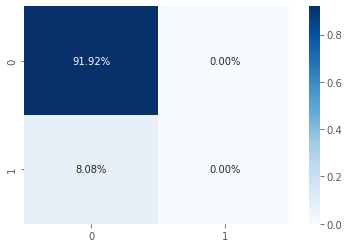

In [28]:
#cmap='Blues'
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, cmap='Blues',
            fmt='.2%')

Le recall des prêts des clients en défaut de payement est de 0% , cela signifie qu'il n'y a pas de client en défaut de payement.
Ceci constitue un grand risque de perte d'argent pour la banque.

Tandisque , le modèle prédit bien que 100% des clients ne sont pas en défaut de payement et celà peut entrainer une faillite à la banque.

## Essai de plusieurs algorithmes de Machine Learning

Création d'une fonction pour afficher les différentes metrics avec de nouvels modèle

In [29]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [30]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
    print('='*60)
   
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

### Model-1: Logistic Regression

In [31]:
%%time
lr_clf = LogisticRegression(max_iter = 400, solver = 'lbfgs')   

lr_parameters = {'C':np.logspace(-10, 1, 15),
                 'class_weight':[None,'balanced'],
                 'penalty':['l1','l2']
                }
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

lr_grid = RandomizedSearchCV(lr_clf, lr_parameters, cv=cv, refit='True', n_jobs=-1, verbose=1, scoring='roc_auc')
lr_grid.fit(X_train, y_train)

lr_model = lr_grid.best_estimator_

# update model scoreboard
results = results.append({'Model Type' : 'Logistic Regression',
                          'AUC - Score' : lr_grid.best_score_,
                          'AUC - Test' : roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]),
                          'Hyperparameters' : lr_grid.best_params_},
                        ignore_index=True)
results


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 1min 33s


Model Type  AUC - Score  AUC - Test  \
0  Logistic Regression     0.748717    0.744759   

                                                           Hyperparameters  
0  {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.26826957952797276}

In [32]:
test_eval(lr_grid, X_test, y_test, 'Logistic Regression', 'actual')

Confusion Matrix
[[58339 25913]
 [ 2412  4998]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     84252
           1       0.16      0.67      0.26      7410

    accuracy                           0.69     91662
   macro avg       0.56      0.68      0.53     91662
weighted avg       0.90      0.69      0.76     91662
 

AUC-ROC
0.7447589946566701


### Model-2: Decision Tree

In [33]:
estimators = [2,10,30,50,100]

# Nombre maximum de profondeur dans chaque arbre :
max_depth = [i for i in range(5,16,2)]

# Nombre minimum d'échantillons à prendre en compte pour scinder un nœud :
min_samples_split = [2, 5, 10, 15, 20, 50, 100]

# Nombre minimum d'échantillons à considérer à chaque nœud feuille :
min_samples_leaf = [1, 2, 5]

In [34]:
%%time
dt_clf = DecisionTreeClassifier(random_state=1)
dt_parameters = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf}

dt_grid = RandomizedSearchCV(dt_clf, dt_parameters, cv=cv, refit='True', n_jobs=-1, verbose=1, scoring='roc_auc')
dt_grid.fit(X_train, y_train)
dt_model = dt_grid.best_estimator_

# mettre à jour le tableau de bord du modèle
results = results.append({'Model Type' : 'Decision Tree',
                          'AUC - Score' : dt_grid.best_score_,
                          'AUC - Test' : roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1]),
                          'Hyperparameters' : dt_grid.best_params_},
                        ignore_index=True)

results

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 1min 3s


Model Type  AUC - Score  AUC - Test  \
0  Logistic Regression     0.748717    0.744759   
1        Decision Tree     0.713777    0.715671   

                                                           Hyperparameters  
0  {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.26826957952797276}  
1         {'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 7}

In [35]:
test_eval(dt_grid, X_test, y_test, 'Decision Tree', 'actual')

Confusion Matrix
[[84146   106]
 [ 7340    70]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84252
           1       0.40      0.01      0.02      7410

    accuracy                           0.92     91662
   macro avg       0.66      0.50      0.49     91662
weighted avg       0.88      0.92      0.88     91662
 

AUC-ROC
0.715671384407282


### Model-3: Random Forest

In [36]:
%%time
rf_clf = RandomForestClassifier(random_state=1, n_estimators=100)
rf_parameters = {'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}

rf_grid = RandomizedSearchCV(rf_clf, rf_parameters, cv=cv, refit='True', n_jobs=-1, verbose=1, scoring='roc_auc')
rf_grid.fit(X_train, y_train)
rf_model = rf_grid.best_estimator_

# update model scoreboard
results = results.append({'Model Type' : 'Random Forest',
                          'AUC - Score' : rf_grid.best_score_,
                          'AUC - Test' : roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]),
                          'Hyperparameters' : rf_grid.best_params_},
                        ignore_index=True)

results

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 3min 2s


Model Type  AUC - Score  AUC - Test  \
0  Logistic Regression     0.748717    0.744759   
1        Decision Tree     0.713777    0.715671   
2        Random Forest     0.745102    0.742025   

                                                           Hyperparameters  
0  {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.26826957952797276}  
1         {'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 7}  
2          {'n_estimators': 100, 'min_samples_split': 100, 'max_depth': 9}

In [37]:
test_eval(rf_grid, X_test, y_test, 'Random Forest', 'actual')

Confusion Matrix
[[84252     0]
 [ 7410     0]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84252
           1       0.00      0.00      0.00      7410

    accuracy                           0.92     91662
   macro avg       0.46      0.50      0.48     91662
weighted avg       0.84      0.92      0.88     91662
 

AUC-ROC
0.7420247739526744


### Model-3: LightGBM

In [38]:
#test_eval(lgbm_grid, X_test, y_test, 'LightGBM', 'actual')

###  Model-4: Gradient Boosting

In [39]:
%%time
import xgboost as xgb

XGB_clf = xgb.XGBClassifier() 
XGB_parameters = {
    'max_depth': range(1, 3, 5),
    'n_estimators': range(10, 50, 100),
    'learning_rate': [0.25, 0.5, 0.75, 1, 1.25, 1.5]}

XGB_grid = RandomizedSearchCV(XGB_clf, XGB_parameters, cv=cv, n_jobs=-1, verbose=1, scoring='roc_auc')
XGB_grid.fit(X_train, y_train)
XGB_model = XGB_grid.best_estimator_

# update model scoreboard
results = results.append({'Model Type' : 'XG Boost',
                          'AUC - Score' : XGB_grid.best_score_,
                          'AUC - Test' : roc_auc_score(y_test, XGB_model.predict_proba(X_test)[:,1]),
                          'Hyperparameters' : XGB_grid.best_params_},
                        ignore_index=True)

results

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[19:31:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 23 s


Model Type  AUC - Score  AUC - Test  \
0  Logistic Regression     0.748717    0.744759   
1        Decision Tree     0.713777    0.715671   
2        Random Forest     0.745102    0.742025   
3             XG Boost     0.724984    0.721964   

                                                           Hyperparameters  
0  {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.26826957952797276}  
1         {'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 7}  
2          {'n_estimators': 100, 'min_samples_split': 100, 'max_depth': 9}  
3                 {'n_estimators': 10, 'max_depth': 1, 'learning_rate': 1}

In [40]:
test_eval(XGB_grid, X_test, y_test, 'Random Forest', 'actual')

Confusion Matrix
[[84116   136]
 [ 7265   145]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84252
           1       0.52      0.02      0.04      7410

    accuracy                           0.92     91662
   macro avg       0.72      0.51      0.50     91662
weighted avg       0.89      0.92      0.88     91662
 

AUC-ROC
0.7219636780808529


In [41]:
%%time
import xgboost as xgb

# define model
xgb_model =  xgb.XGBClassifier()
clf_XGB = xgb_model.fit(X_train, y_train)

# define cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(xgb_model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean AUROC: %.3f' % np.mean(scores))

[19:31:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mean AUROC: 0.757
Wall time: 10min 45s


In [42]:
test_eval(clf_XGB, X_test, y_test, 'Gradient Boosting', 'actual-crossval')

Confusion Matrix
[[83950   302]
 [ 7141   269]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84252
           1       0.47      0.04      0.07      7410

    accuracy                           0.92     91662
   macro avg       0.70      0.52      0.51     91662
weighted avg       0.89      0.92      0.89     91662
 

AUC-ROC
0.7556793151167921


### Comparaison des modèles

In [43]:
# Affichage des résultats
results

Model Type  AUC - Score  AUC - Test  \
0  Logistic Regression     0.748717    0.744759   
1        Decision Tree     0.713777    0.715671   
2        Random Forest     0.745102    0.742025   
3             XG Boost     0.724984    0.721964   

                                                           Hyperparameters  
0  {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.26826957952797276}  
1         {'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 7}  
2          {'n_estimators': 100, 'min_samples_split': 100, 'max_depth': 9}  
3                 {'n_estimators': 10, 'max_depth': 1, 'learning_rate': 1}

In [44]:
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [45]:
# Affichage des résultats
clf_eval_df

model         resample  precision    recall  f1-score  \
0  Logistic Regression           actual   0.161690  0.674494  0.260849   
1        Decision Tree           actual   0.397727  0.009447  0.018455   
2        Random Forest           actual   0.000000  0.000000  0.000000   
3        Random Forest           actual   0.516014  0.019568  0.037706   
4    Gradient Boosting  actual-crossval   0.471103  0.036302  0.067410   

    AUC-ROC  
0  0.744759  
1  0.715671  
2  0.742025  
3  0.721964  
4  0.755679

Aprés l'entrainement de la liste de nos différentes modèle , on a le RandomForestClassier() qui est la plus performant avec comme moyenne de score 93%.
Nous allons continuer avec cette classifieur pour la suite

## Sans cross validation score

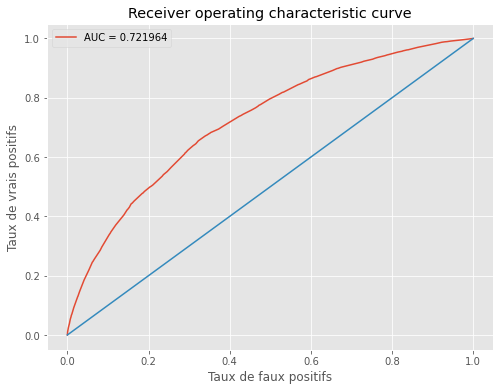

In [46]:
probabilities = XGB_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
auc = roc_auc_score(y_test, probabilities)               
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)                                        
plt.plot([0, 1], [0, 1])                                 
plt.title('Receiver operating characteristic curve')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(["AUC = %.6f"%auc])
plt.show()

## Cross validation score

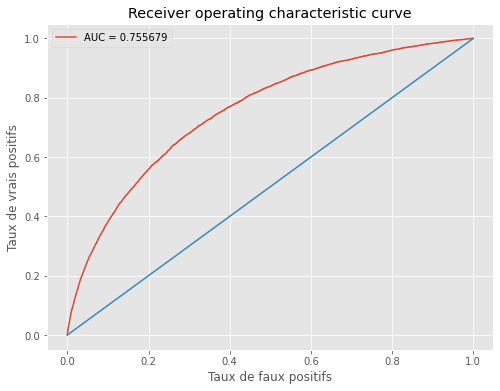

In [47]:
probabilities = clf_XGB.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
auc = roc_auc_score(y_test, probabilities)               
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)                                        
plt.plot([0, 1], [0, 1])                                 
plt.title('Receiver operating characteristic curve')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(["AUC = %.6f"%auc])
plt.show()

## Détermination de l'importance des prédicteurs

Notre modèle a deux problèmes majeurs : overfiting et mauvaise prédiction des prêts en défaut 
de paiement. Ce dernier problème est certainement dû au déséquilibre de classe observé dans 
l'analyse exploratoire des données.

Il peut être très difficile de jongler entre la précision et le recall lorsqu'on tente d'augmenter la 
performance d'un modèle de classification. Heureusement, il existe une métrique qui combine 
les deux : F1-Score


In [48]:
# Selection de features importants
vars_imp = pd.Series(clf_XGB.feature_importances_, index = X_train.columns).sort_values(ascending=False)
vars_imp

EXT_SOURCE_3                                         0.044560
EXT_SOURCE_2                                         0.043016
NAME_EDUCATION_TYPE_Higher education                 0.040962
CODE_GENDER                                          0.028861
NAME_INCOME_TYPE_State servant                       0.022972
NAME_INCOME_TYPE_Working                             0.022897
CREDIT_TERM                                          0.021657
REGION_RATING_CLIENT_W_CITY                          0.020675
FLAG_DOCUMENT_3                                      0.020138
OCCUPATION_TYPE_Core staff                           0.018887
GOODS_PRICE_CREDIT_PER                               0.018872
EXT_SOURCE_1                                         0.018795
NAME_FAMILY_STATUS_Married                           0.018429
REG_CITY_NOT_LIVE_CITY                               0.017861
NAME_HOUSING_TYPE_Rented apartment                   0.017112
AMT_GOODS_PRICE                                      0.017101
FLAG_OWN

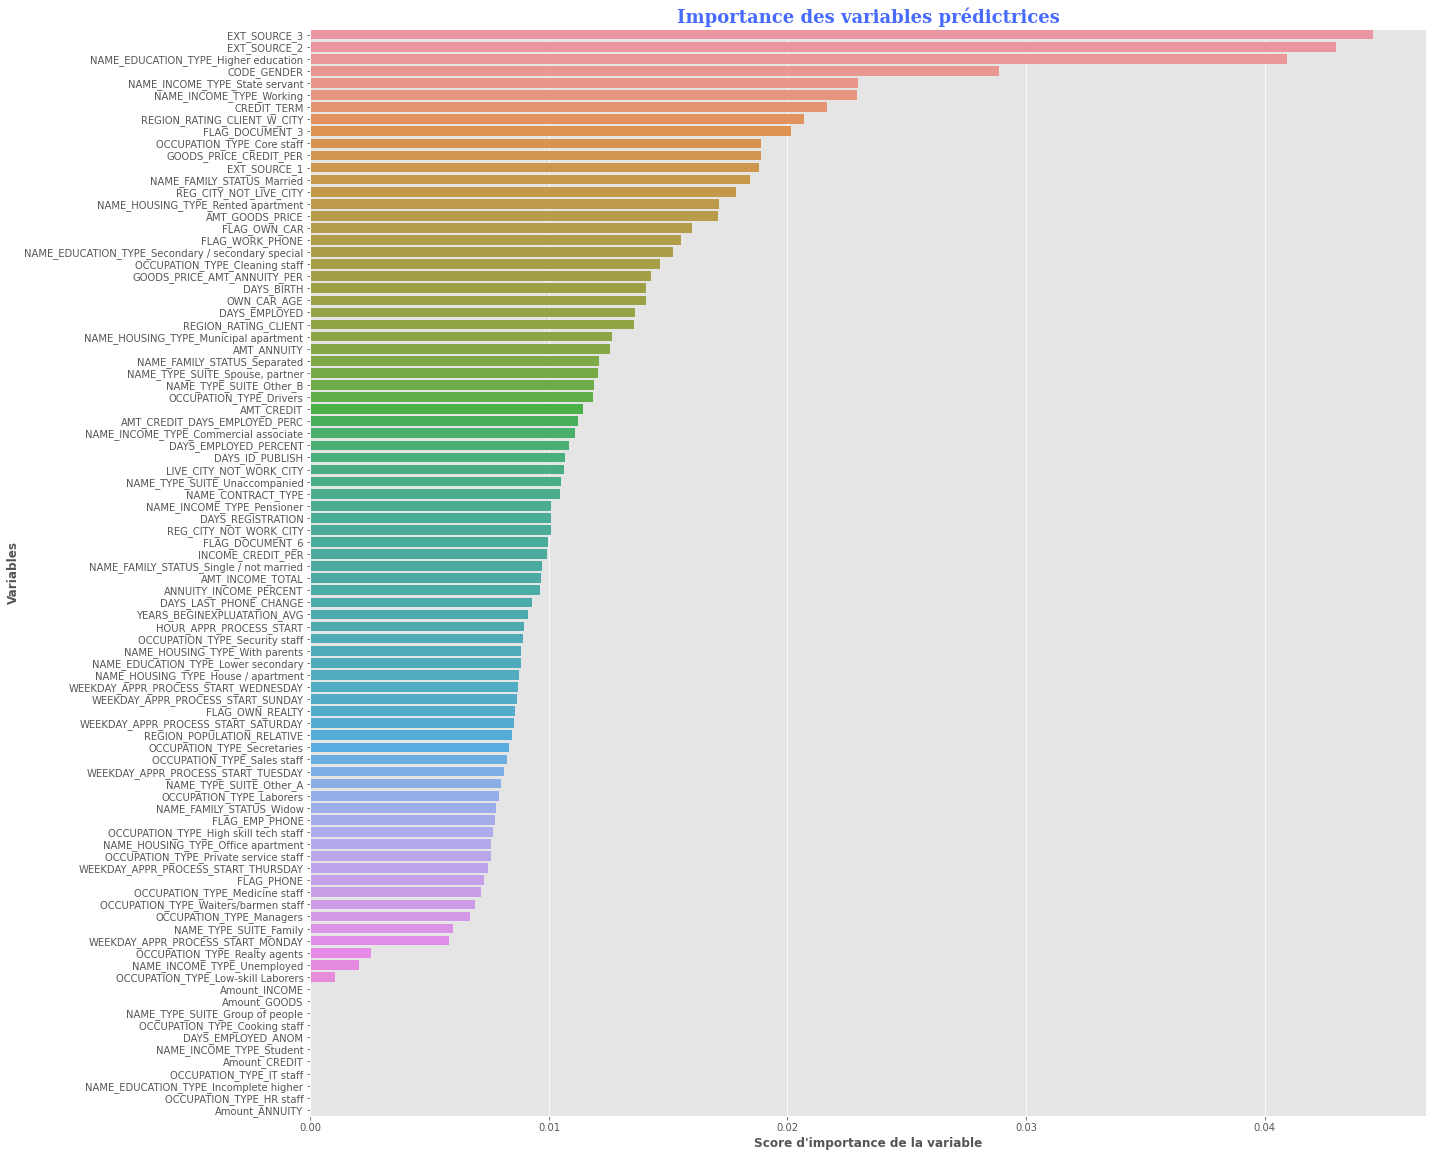

In [49]:
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}

# Visualisation des variables importantes
plt.figure(figsize=(20,20))
sns.barplot(x=vars_imp, y=vars_imp.index)
plt.xlabel("Score d'importance de la variable", fontweight="bold")
plt.ylabel('Variables', fontweight="bold")
plt.title("Importance des variables prédictrices", fontdict=font_title)
plt.show()

## Reconstruction d'un modèle 

Remodélisons les données en ne considérant cette fois-ci que les variables dont le score 
d'importance est supérieur à 0,010.

In [50]:
# Variables dont le score(seuil) d'importance est supérieur à 0.010
vars_selected = vars_imp[vars_imp > 0.010].index.to_list()
vars_selected

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'NAME_EDUCATION_TYPE_Higher education',
 'CODE_GENDER',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Working',
 'CREDIT_TERM',
 'REGION_RATING_CLIENT_W_CITY',
 'FLAG_DOCUMENT_3',
 'OCCUPATION_TYPE_Core staff',
 'GOODS_PRICE_CREDIT_PER',
 'EXT_SOURCE_1',
 'NAME_FAMILY_STATUS_Married',
 'REG_CITY_NOT_LIVE_CITY',
 'NAME_HOUSING_TYPE_Rented apartment',
 'AMT_GOODS_PRICE',
 'FLAG_OWN_CAR',
 'FLAG_WORK_PHONE',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'OCCUPATION_TYPE_Cleaning staff',
 'GOODS_PRICE_AMT_ANNUITY_PER',
 'DAYS_BIRTH',
 'OWN_CAR_AGE',
 'DAYS_EMPLOYED',
 'REGION_RATING_CLIENT',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'AMT_ANNUITY',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_TYPE_SUITE_Spouse, partner',
 'NAME_TYPE_SUITE_Other_B',
 'OCCUPATION_TYPE_Drivers',
 'AMT_CREDIT',
 'AMT_CREDIT_DAYS_EMPLOYED_PERC',
 'NAME_INCOME_TYPE_Commercial associate',
 'DAYS_EMPLOYED_PERCENT',
 'DAYS_ID_PUBLISH',
 'LIVE_CITY_NOT_WORK_CITY',
 'NAM

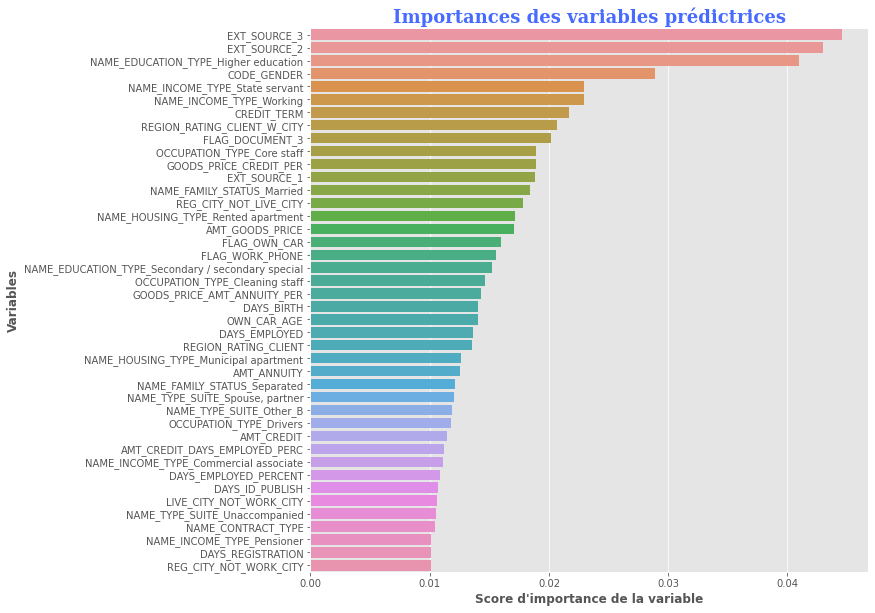

In [51]:
# Visualisation des variables importantes
plt.figure(figsize=(10,10))
sns.barplot(x=vars_imp[vars_imp > 0.010], y=vars_selected)
plt.xlabel("Score d'importance de la variable", fontweight="bold")
plt.ylabel("Variables", fontweight="bold")
plt.title("Importances des variables prédictrices", fontdict=font_title)
plt.show()

In [52]:
# Nombbre de variables prédictrices
len(vars_selected)

42

Finalement on aura 35 variables qui iront à la modélisation

In [53]:
# Nouvelle division des données
X1_train, X1_test, y1_train, y1_test = train_test_split(X[vars_selected], y, stratify = y, test_size = 0.3, random_state = seed)

In [54]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(213877, 42)
(91662, 42)
(213877,)
(91662,)


Nous allons à nouveau réexécuter les algorithmes aprés selection de features importantes pour faire des comparaisons

Le modèle avec le meilleur score est le gradient boosting

In [55]:
# Entraînement du modèle
clf_XGB.fit(X1_train, y1_train)

# Prédictions
y1_pred = clf_XGB.predict(X1_test)

[19:42:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

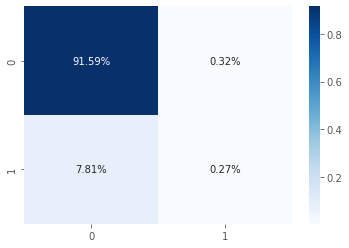

In [56]:
#cmap='Blues'
confu_matrix = confusion_matrix(y1_test, y1_pred)
sns.heatmap(confu_matrix/np.sum(confu_matrix), annot=True, cmap='Blues',
            fmt='.2%')

In [57]:
# Rapport de classification
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84252
           1       0.46      0.03      0.06      7410

    accuracy                           0.92     91662
   macro avg       0.69      0.52      0.51     91662
weighted avg       0.88      0.92      0.89     91662



En ne sélectionnant que les variables indépendantes dont le score d'importance est supérieur à 0,010, les performances du modèle (voir rapport de classification ci-dessus) n'ont pas été amélioré. Cette opération nous a quand même permise de réduire la complexité du modèle car 
nous sommes passés de 89 à 30 variables indépendantes tout en gardant les mêmes performances qu'avec le premier modèle.

Dans ce qui suit, nous appliquerons la méthode de sous-échantillonnage afin de régler le problème de déséquilibre de classe.

# Methode de sur échantillonnage

## Technique SMOTE ( Synthetitic Minority Oversample)

SMOTE est une technique de suréchantillonnage où les échantillons synthétiques sont générés pour la classe minoritaire. Cet algorithme permet de surmonter le problème de surajustement posé par le suréchantillonnage aléatoire. Il se concentre sur l'espace des fonctionnalités pour générer de nouvelles instances à l'aide d'une interpolation entre les instances positives qui se trouvent ensemble.

In [58]:
# Données d'entrainement et de test
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.30, random_state= seed)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (213877, 90)
X_test shape: (91662, 90)
y_train shape: (213877,)
y_test shape: (91662,)


In [59]:
X_train.to_csv("X_train.csv", index = False)
X_test.to_csv("X_test.csv", index = False)

In [60]:
# Standardisation
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [61]:
X_train.to_csv("X_train_stand.csv", index = False)
X_test.to_csv("X_test_stand.csv", index = False)

In [62]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 196586, 1: 17291})
After Counter({0: 196586, 1: 196586})


In [63]:
y_train_sm.value_counts(normalize=True)

0    0.5
1    0.5
Name: TARGET, dtype: float64

In [64]:
X_train_sm.to_csv("X_train_sm.csv")

## Modélisation après resample

Nous allons dans cas réessayer tous les modèles faites au dessus avec cette fois les techniques de suréchantillonnage de SMOTE et en première essai avec notre modèle de base

### Définition de quelques fonctions

In [65]:
# Stocker les résulats dans un dataframe
pd.set_option('display.max_colwidth', None)             
resultats = pd.DataFrame(columns = ['Model Type', 'AUC - Test', 'Hyperparameters','precision',
                                   'recall','F1score'])

In [66]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [67]:
def eval_test(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

## Définition de la métrique 'banking'

In [68]:

def customScore(y_test, y_pred):

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    tp_value = 0
    tn_value = 1
    fn_value = -10
    fp_value = 0
    
    # Gain total
    gain = tp*tp_value + tn*tn_value + fp*fp_value + fn*fn_value

    # Gain maximum
    gain_max = (fp + tn)*tn_value + (fn + tp)*tp_value

    # Gain minimum
    gain_min = (fp + tn)*fp_value + (fn + tp)*fn_value

    # Gain normalisé entre 0 et 1
    gain_norm = (gain - gain_min)/(gain_max - gain_min)

    return gain_norm 


In [69]:
def Histo(colonne,base,bines):
    sns.displot(x=colonne,data=base, kde=False, bins=bines,color="darkgreen")
    plt.grid()

Création de notre propre métrique pour évaluer notre modéle et les utiliser dans la recherche d'hyperparamétres, plus on s'approche de 100 plus il est meilleur

In [70]:
#création de notre propre score grace à make_scorer
#,greater_is_better = True
from sklearn.metrics import make_scorer
scorer = make_scorer(customScore, greater_is_better = True) 

## Regression Logistique + SMOTE

In [71]:
%%time
lr_clf = LogisticRegression(max_iter = 400, solver = 'lbfgs')       

lr_parameters = {'C':np.logspace(-10, 1, 15),
                 'class_weight':[None,'balanced'],
                 'penalty':['l1','l2']
                }
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

lr_grid =RandomizedSearchCV(lr_clf, lr_parameters, cv=cv, refit='True', n_jobs=-1, verbose=1, return_train_score=True, scoring=scorer)

lr_grid.fit(X_train_sm, y_train_sm) 
lr_params = lr_grid.best_params_
lr_model = lr_grid.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 2min 34s


In [72]:
#f_betascore
lr_grid.best_score_

0.7718241180351137

Avec ce graphe nous allons fixer un seuil de 0,5

### Choix du seuil

Avec la fonction predict nous avons un seuil qui est égal à 0.5. avec predict_proba permet de calculer les probabilité d'affectation aux classes 0 ou 1 et permet de choisir un seuil On va choisir un seuil qui nous dit si notre score de proba dépasse ce seuil on est 1 (le client sera en défaut de payement) sinon on est 0 (le client ne sera pas en défaut de payement). Le choix de seuil est important car si on le prend trop grand nous allons prédire beaucoup de gens qui ne vont rembourser. Si le seuil est trop petit nous allons prédire beaucoup de gens qui ne vont pas rembourser C'est un choix métier nous allons d'abord tracer l'histogramme du prédict proba pour voir ?

In [73]:
# Choix du seuil
#lr_model.predict(X_test)
y_predrl= lr_model.predict(X_test)

In [74]:
y_predrl

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [75]:
score_reg = customScore(y_test, y_predrl)
score_reg

0.6373269677680105

In [76]:
# la precision
precision_RL=accuracy_score(y_test, y_predrl)
precision_RL

0.5483297331500513

In [77]:
#taux de vrais positifs 
rappel_RL=recall_score(y_test, y_predrl)
rappel_RL

0.7596491228070176

In [78]:
# Rapport de classification
print(classification_report(y_test, y_predrl))

              precision    recall  f1-score   support

           0       0.96      0.53      0.68     84252
           1       0.12      0.76      0.21      7410

    accuracy                           0.55     91662
   macro avg       0.54      0.64      0.45     91662
weighted avg       0.89      0.55      0.65     91662



Text(33.0, 0.5, 'Classe réelle')

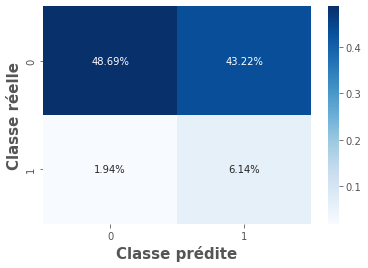

In [79]:
#cmap='Blues'
confu_matrix = confusion_matrix(y_test, y_predrl)
sns.heatmap(confu_matrix/np.sum(confu_matrix), annot = True, cmap = 'Blues',
            fmt = '.2%')
plt.xlabel('Classe prédite',fontsize = 15, fontweight = 'bold')
plt.ylabel('Classe réelle',fontsize = 15, fontweight = 'bold')

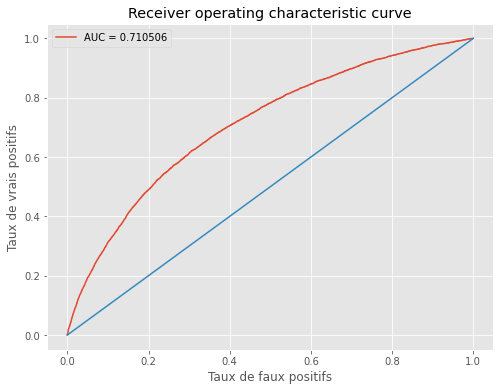

In [80]:
# graphe
probabilities = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
AUROC_RL = roc_auc_score(y_test, probabilities)               
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)                                        
plt.plot([0, 1], [0, 1])                                 
plt.title('Receiver operating characteristic curve')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(["AUC = %.6f"%AUROC_RL])
plt.show()

In [81]:
idx = np.min(np.where(tpr > 0.95)) 
print("Sensibilité : {:.2f}".format(tpr[idx]))
print("Spécificité : {:.2f}".format(1-fpr[idx]))
print("Seuil : {:.2f}".format(thresholds[idx]))

Sensibilité : 0.95
Spécificité : 0.18
Seuil : 0.50


### Modèle de base (comparaison)

Le modeèle de base nous sert de comparaison avec les différentes autres modèles à tester

In [82]:
# Instanciation du modèle
clf_dummy_sm = DummyClassifier(strategy="most_frequent") 

#entrainement
clf_dummy_sm.fit(X_train_sm, y_train_sm) 

# Prediction
y_pred_dm = clf_dummy_sm.predict(X_test)

In [83]:
# Précision globale du modèle
print("Le score sur les données d'entraînement est :", clf_dummy_sm.score(X_train_sm, y_train_sm))
print("Le score sur les données d'évaluation est :", clf_dummy_sm.score(X_test, y_test))

Le score sur les données d'entraînement est : 0.5
Le score sur les données d'évaluation est : 0.9191595208483341


In [84]:
# Evaluation sur les données test
print("Accuray score: ", accuracy_score(y_test, y_pred_dm))

Accuray score:  0.9191595208483341


In [85]:
AUROC_BA=roc_auc_score(y_test, clf_dummy_sm.predict_proba(X_test)[:, 1])
AUROC_BA

0.5

In [86]:
print('AUC : {}'.format(roc_auc_score(y_test, clf_dummy.predict_proba(X_test)[:, 1])))

AUC : 0.5


### Feature importance avec Regression Logistique

In [87]:
# Selection de features importants
vars_implr = pd.Series(lr_model.coef_[0], index = X_train.columns).sort_values(ascending=False)
vars_implr

GOODS_PRICE_CREDIT_PER                               1.006466e-04
NAME_INCOME_TYPE_Working                             9.781632e-05
DAYS_EMPLOYED                                        9.699830e-05
NAME_EDUCATION_TYPE_Secondary / secondary special    8.864574e-05
REGION_RATING_CLIENT_W_CITY                          8.467925e-05
DAYS_LAST_PHONE_CHANGE                               8.447939e-05
REGION_RATING_CLIENT                                 8.028080e-05
FLAG_DOCUMENT_3                                      7.909298e-05
DAYS_EMPLOYED_PERCENT                                7.764111e-05
AMT_CREDIT_DAYS_EMPLOYED_PERC                        7.269086e-05
DAYS_ID_PUBLISH                                      6.582974e-05
DAYS_REGISTRATION                                    6.469392e-05
FLAG_EMP_PHONE                                       6.175834e-05
REG_CITY_NOT_WORK_CITY                               5.741171e-05
NAME_CONTRACT_TYPE                                   4.957233e-05
REG_CITY_N

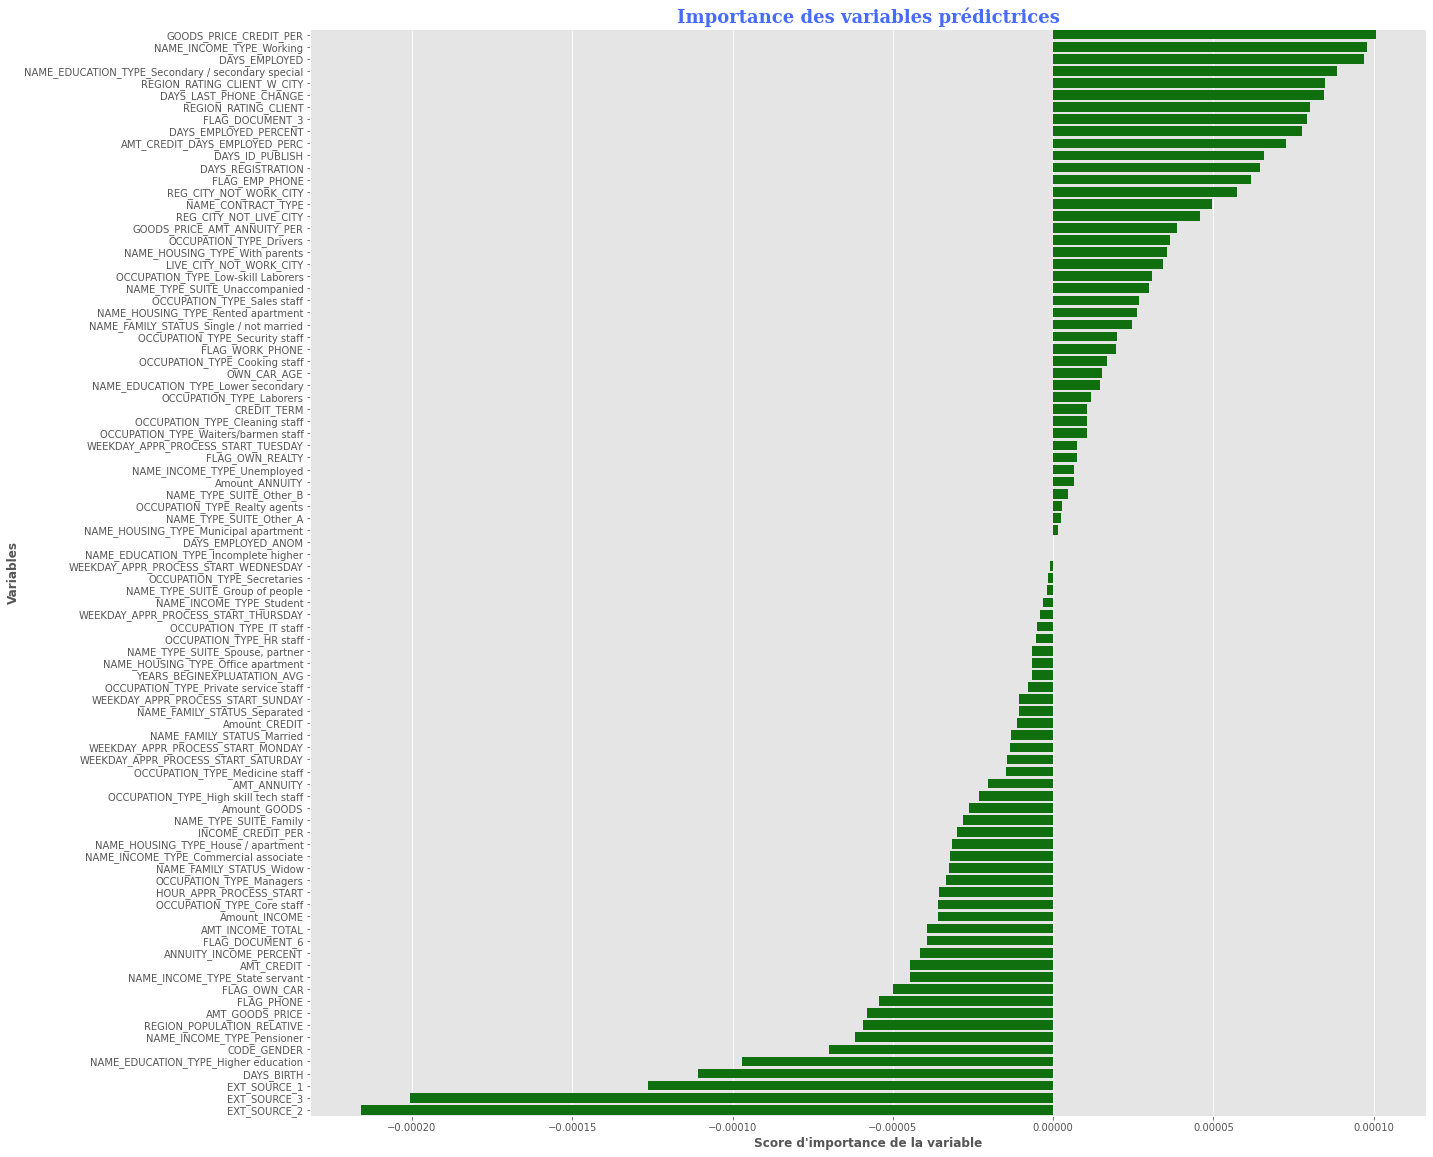

In [88]:
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}

# Visualisation des variables importantes
plt.figure(figsize=(20,20))
sns.barplot(x=vars_implr, y=vars_implr.index, color='green')
plt.xlabel("Score d'importance de la variable", fontweight="bold")
plt.ylabel('Variables', fontweight="bold")
plt.title("Importance des variables prédictrices", fontdict=font_title)
plt.show()

## Decision Tree + SMOTE

In [89]:
%%time
dt_clf = DecisionTreeClassifier(random_state=1)
dt_parameters = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf}

dt_grid = RandomizedSearchCV(dt_clf, dt_parameters, cv=cv, refit='True', n_jobs=-1, verbose=1, return_train_score=True, scoring=scorer)
dt_grid.fit(X_train_sm, y_train_sm)
dt_params = dt_grid.best_params_
dt_model = dt_grid.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 2min 11s


In [90]:
#f_betascore
dt_grid.best_score_

0.8156453310467675

### Metriques

In [91]:
# Choix du seuil
#r=dt_model.predict_proba(X_test)[:,1]
y_predt=dt_model.predict(X_test)

In [92]:
y_predt 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
score_decision = customScore(y_test, y_predt)
score_decision

0.5919975750227342

In [94]:
# Comparaison des deux scores
score_reg, score_decision

(0.6373269677680105, 0.5919975750227342)

In [95]:
# la precision
precision_DT = accuracy_score(y_test, y_predt)
precision_DT

0.8211363487595732

In [96]:
#taux de vrais positifs 
rappel_DT = recall_score(y_test, y_predt)
rappel_DT

0.27705802968960863

In [97]:
# Rapport de classification
print(classification_report(y_test, y_predt))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     84252
           1       0.16      0.28      0.20      7410

    accuracy                           0.82     91662
   macro avg       0.54      0.57      0.55     91662
weighted avg       0.87      0.82      0.84     91662



Text(33.0, 0.5, 'Classe réelle')

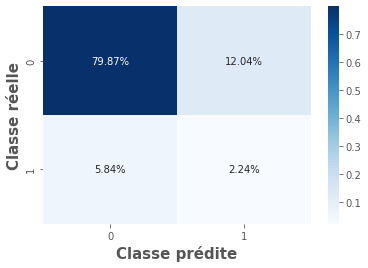

In [98]:
#cmap='Blues'
confu_matrix = confusion_matrix(y_test, y_predt)
sns.heatmap(confu_matrix/np.sum(confu_matrix), annot=True, cmap='Blues',
            fmt='.2%')
plt.xlabel('Classe prédite',fontsize = 15, fontweight = 'bold')
plt.ylabel('Classe réelle',fontsize = 15, fontweight = 'bold')

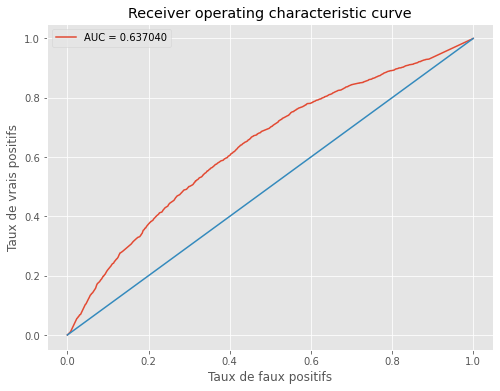

In [99]:
# graphe
probabilities = dt_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
AUROC_DT = roc_auc_score(y_test, probabilities)               
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)                                        
plt.plot([0, 1], [0, 1])                                 
plt.title('Receiver operating characteristic curve')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(["AUC = %.6f"%AUROC_DT])
plt.show()

In [100]:
idx = np.min(np.where(tpr > 0.95)) 

print("Sensibilité : {:.2f}".format(tpr[idx]))
print("Spécificité : {:.2f}".format(1-fpr[idx]))
print("Seuil : {:.2f}".format(thresholds[idx]))

Sensibilité : 1.00
Spécificité : 0.00
Seuil : 0.00


### Comparaison bayésienne

In [101]:
AUROC_BA=roc_auc_score(y_test, clf_dummy_sm.predict_proba(X_test)[:, 1])
AUROC_BA

0.5

### Feature importance avec Decision Tree

In [102]:
# Selection de features importants
vars_impdt = pd.Series(dt_model.feature_importances_, index = X_train.columns).sort_values(ascending=False)
vars_impdt

EXT_SOURCE_3                                         0.157323
EXT_SOURCE_2                                         0.120863
FLAG_OWN_CAR                                         0.114100
GOODS_PRICE_CREDIT_PER                               0.112369
CODE_GENDER                                          0.102298
FLAG_PHONE                                           0.048572
FLAG_OWN_REALTY                                      0.035513
DAYS_LAST_PHONE_CHANGE                               0.029529
NAME_EDUCATION_TYPE_Secondary / secondary special    0.026633
EXT_SOURCE_1                                         0.025625
NAME_INCOME_TYPE_Working                             0.025210
NAME_EDUCATION_TYPE_Higher education                 0.015800
CREDIT_TERM                                          0.015588
FLAG_DOCUMENT_3                                      0.014753
FLAG_WORK_PHONE                                      0.014395
REGION_POPULATION_RELATIVE                           0.008223
DAYS_ID_

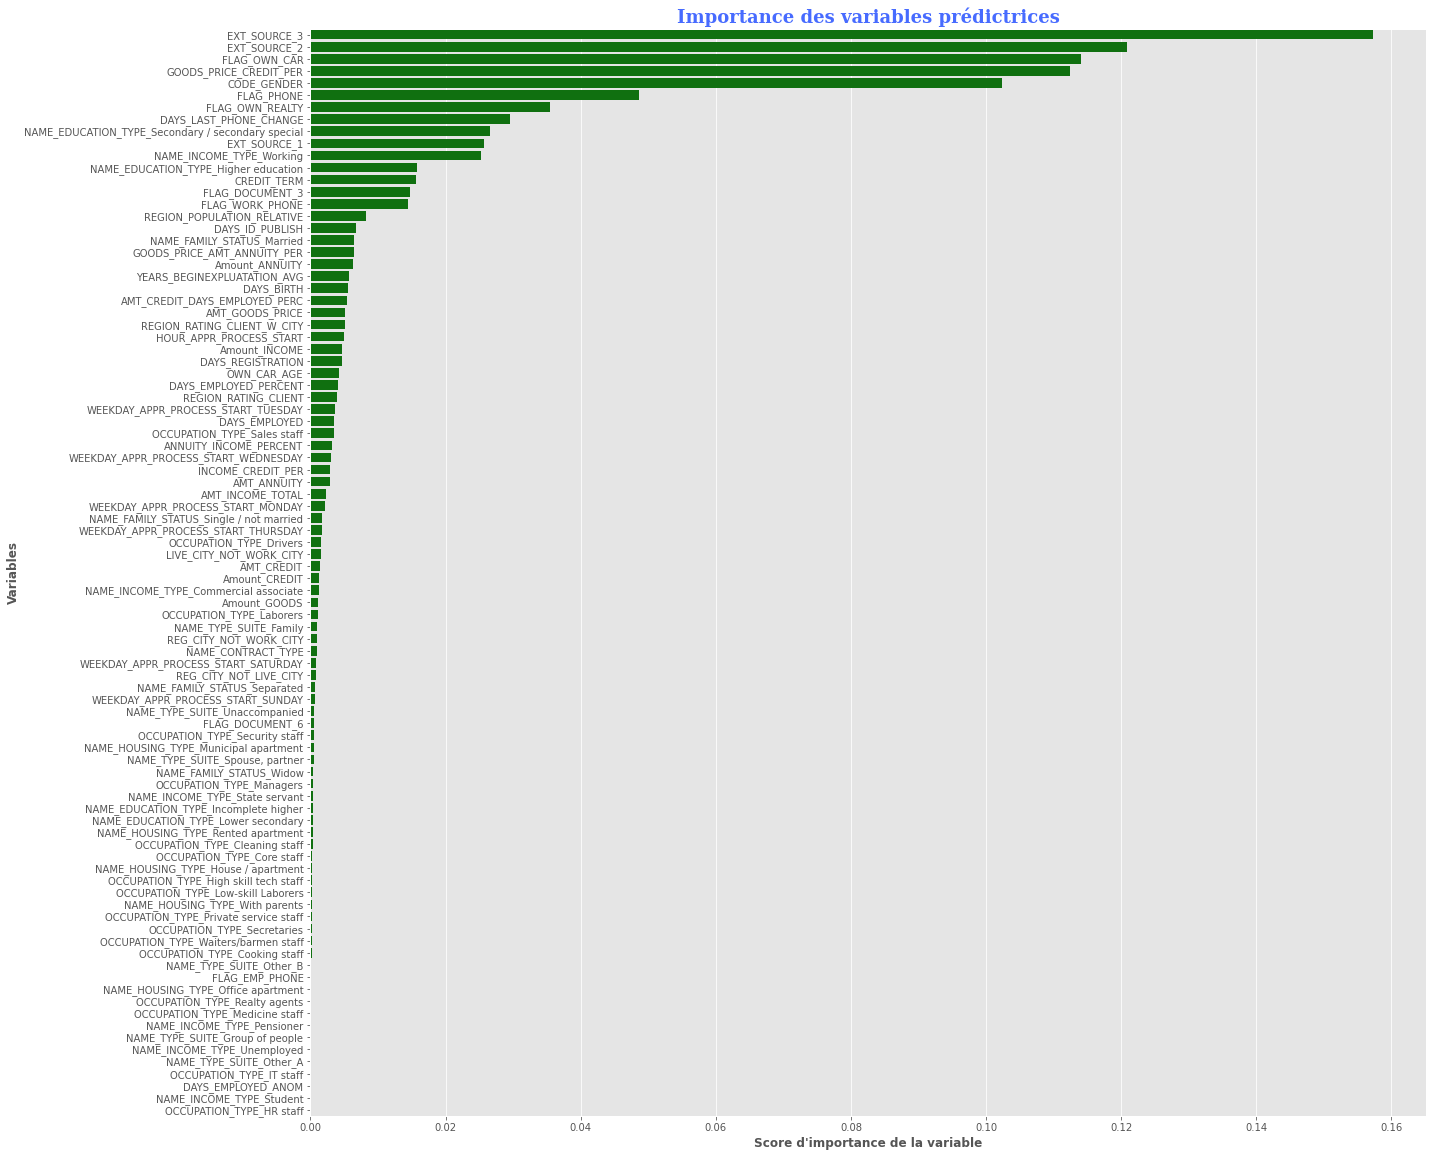

In [103]:
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}

# Visualisation des variables importantes
plt.figure(figsize=(20,20))
sns.barplot(x=vars_impdt, y=vars_impdt.index, color='green')
plt.xlabel("Score d'importance de la variable", fontweight="bold")
plt.ylabel('Variables', fontweight="bold")
plt.title("Importance des variables prédictrices", fontdict=font_title)
plt.show()

## Random Forest + SMOTE

In [104]:
%%time
rf_clf = RandomForestClassifier(random_state=1, n_estimators=100)
rf_parameters = {'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}

rf_grid = RandomizedSearchCV(rf_clf, rf_parameters, cv=cv, refit='True', n_jobs=-1, verbose=1, return_train_score=True, scoring=scorer)
rf_grid.fit(X_train_sm, y_train_sm)
rf_params = rf_grid.best_params_
rf_model = rf_grid.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 8min 3s


In [105]:
#f_betascore
rf_grid.best_score_

0.8830615907898256

### Metriques

In [106]:
# Choix du seuil
#r=rf_model.predict_proba(X_test)[:,1]
y_predrf=rf_model.predict(X_test)

In [107]:
y_predrf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [108]:
score_random = customScore(y_test, y_predrf)
score_random

0.6162789229059311

In [109]:
# Comparaison des trois scores
score_reg, score_random, score_decision

(0.6373269677680105, 0.6162789229059311, 0.5919975750227342)

In [110]:
# la precision
precision_RF = accuracy_score(y_test, y_predrf)
precision_RF

0.8346097619515175

In [111]:
#taux de vrais positifs 
rappel_RF = recall_score(y_test, y_predrf)
rappel_RF

0.31619433198380564

In [112]:
# Rapport de classification
print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     84252
           1       0.19      0.32      0.24      7410

    accuracy                           0.83     91662
   macro avg       0.56      0.60      0.57     91662
weighted avg       0.88      0.83      0.85     91662



Text(33.0, 0.5, 'Classe réelle')

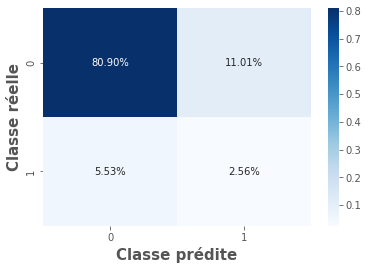

In [113]:
#cmap='Blues'
confu_matrix = confusion_matrix(y_test, y_predrf)
sns.heatmap(confu_matrix/np.sum(confu_matrix), annot=True, cmap='Blues',
            fmt='.2%')
plt.xlabel('Classe prédite',fontsize = 15, fontweight = 'bold')
plt.ylabel('Classe réelle',fontsize = 15, fontweight = 'bold')

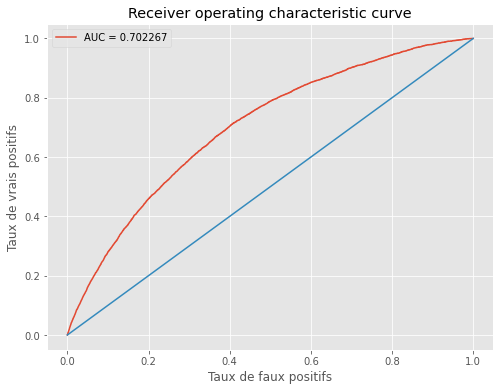

In [114]:
# graphe
probabilities = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
AUROC_RF = roc_auc_score(y_test, probabilities)               
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)                                        
plt.plot([0, 1], [0, 1])                                 
plt.title('Receiver operating characteristic curve')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(["AUC = %.6f"%AUROC_RF])
plt.show()

In [115]:
idx = np.min(np.where(tpr > 0.95)) 

print("Sensibilité : {:.2f}".format(tpr[idx]))
print("Spécificité : {:.2f}".format(1-fpr[idx]))
print("Seuil : {:.2f}".format(thresholds[idx]))

Sensibilité : 0.95
Spécificité : 0.19
Seuil : 0.14


### Comparaison bayésienne

In [116]:
AUROC_BA=roc_auc_score(y_test, clf_dummy_sm.predict_proba(X_test)[:, 1])
AUROC_BA

0.5

### Feature importance avec Random Forest

In [117]:
# Selection de features importants
vars_imprf = pd.Series(rf_model.feature_importances_, index = X_train.columns).sort_values(ascending=False)
vars_imprf

EXT_SOURCE_3                                         0.108293
EXT_SOURCE_2                                         0.088165
FLAG_OWN_CAR                                         0.069936
FLAG_PHONE                                           0.069405
GOODS_PRICE_CREDIT_PER                               0.067896
CODE_GENDER                                          0.056090
NAME_EDUCATION_TYPE_Higher education                 0.044944
FLAG_DOCUMENT_3                                      0.038099
EXT_SOURCE_1                                         0.037367
NAME_INCOME_TYPE_Working                             0.029250
NAME_EDUCATION_TYPE_Secondary / secondary special    0.028869
FLAG_OWN_REALTY                                      0.027146
REGION_POPULATION_RELATIVE                           0.023309
CREDIT_TERM                                          0.023302
DAYS_LAST_PHONE_CHANGE                               0.022084
OWN_CAR_AGE                                          0.020719
DAYS_BIR

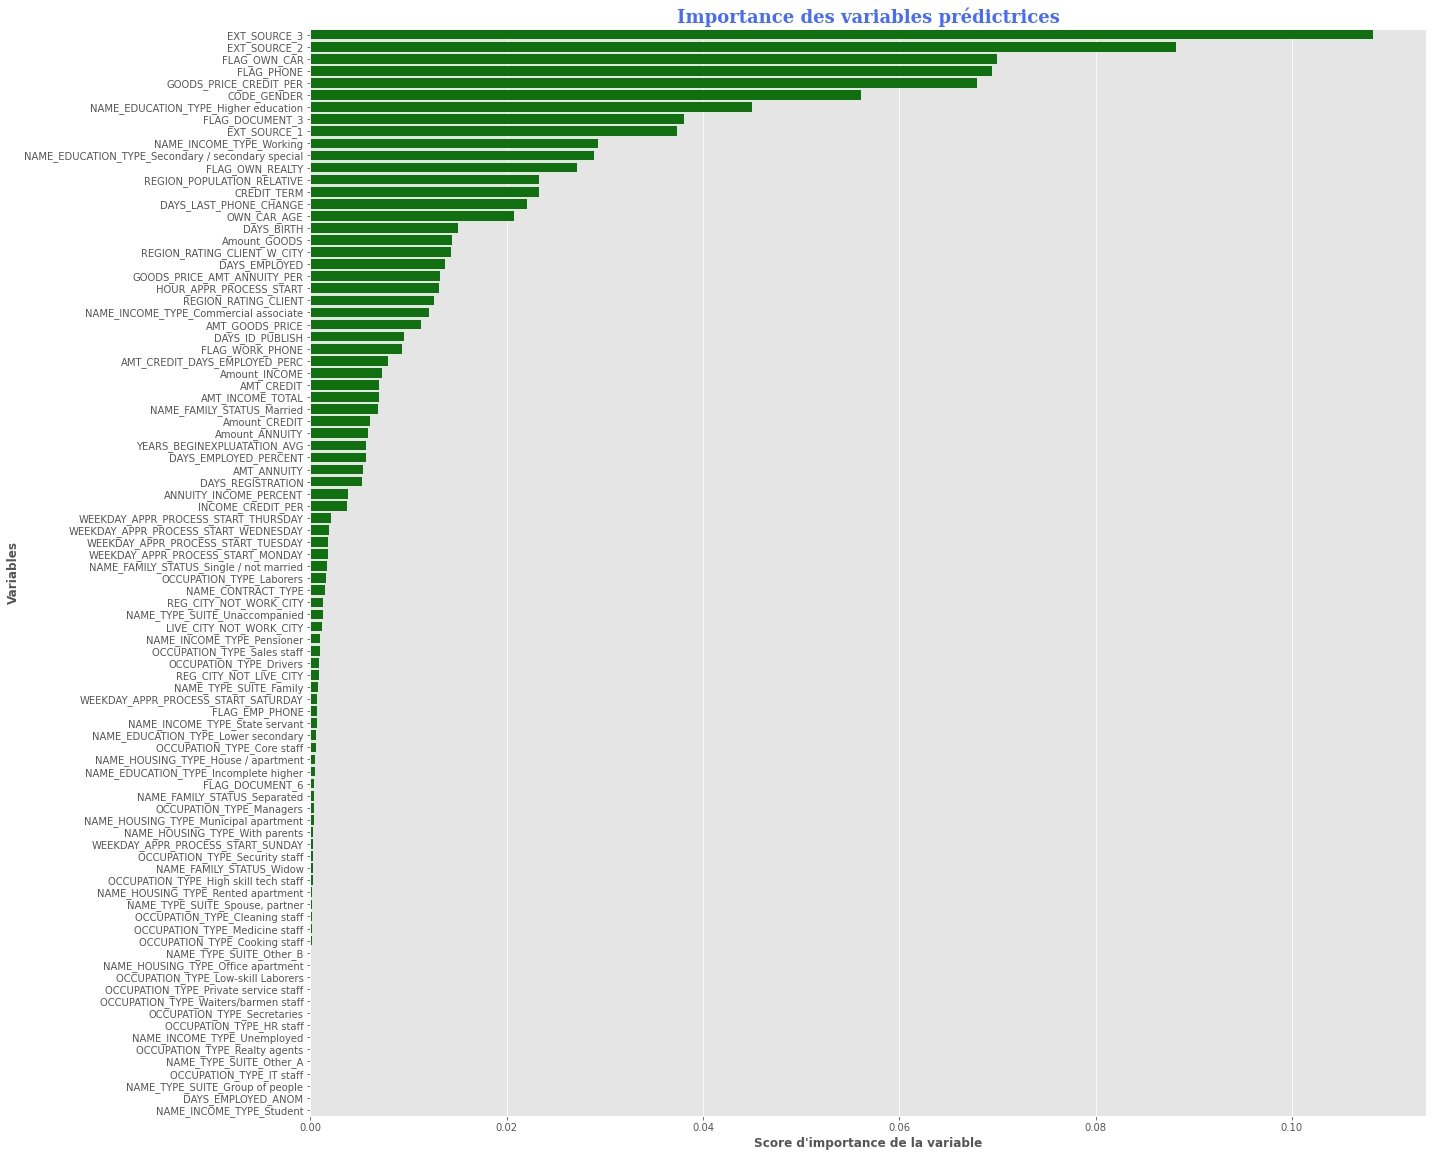

In [118]:
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}

# Visualisation des variables importantes
plt.figure(figsize=(20,20))
sns.barplot(x=vars_imprf, y=vars_imprf.index, color='green')
plt.xlabel("Score d'importance de la variable", fontweight="bold")
plt.ylabel('Variables', fontweight="bold")
plt.title("Importance des variables prédictrices", fontdict=font_title)
plt.show()

## Gradient Boosting + SMOTE

In [119]:
%%time
import xgboost as xgb
XGB_clf = xgb.XGBClassifier() 
XGB_parameters = {
    'max_depth': range(1, 3, 5),
    'n_estimators': range(10, 50, 100),
    'learning_rate': [0.25, 0.5, 0.75, 1, 1.25, 1.5]}

XGB_grid = RandomizedSearchCV(XGB_clf, XGB_parameters, cv=cv, n_jobs=-1, verbose=1, return_train_score=True, scoring=scorer)
XGB_grid.fit(X_train_sm, y_train_sm)
XGB_params = XGB_grid.best_params_
XGB_model = XGB_grid.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[19:58:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 51.6 s


In [120]:
#f_betascore
XGB_grid.best_score_

0.7853217830053552

### Metriques

In [121]:
#r = XGB_model.predict_proba(X_test)[:,1]
y_predgb = XGB_model.predict(X_test)

In [122]:
y_predgb 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [123]:
score_boosting = customScore(y_test, y_predgb)
score_boosting

0.6246526725270284

In [124]:
# Comparaison des quatres scores
score_reg, score_random, score_decision, score_boosting

(0.6373269677680105,
 0.6162789229059311,
 0.5919975750227342,
 0.6246526725270284)

In [125]:
# La précision
precision_XGB = accuracy_score(y_test, y_predgb)
precision_XGB

0.6785254522048395

In [126]:
rappel_XGB = recall_score(y_test, y_predgb)
rappel_XGB

0.5506072874493927

In [127]:
# Rapport de classification
print(classification_report(y_test, y_predgb))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80     84252
           1       0.14      0.55      0.22      7410

    accuracy                           0.68     91662
   macro avg       0.54      0.62      0.51     91662
weighted avg       0.88      0.68      0.75     91662



Text(33.0, 0.5, 'Classe réelle')

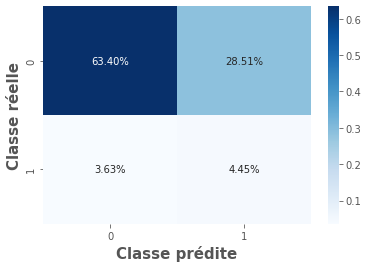

In [128]:
#cmap='Blues'
confu_matrix = confusion_matrix(y_test, y_predgb)
sns.heatmap(confu_matrix/np.sum(confu_matrix), annot=True, cmap='Blues',
            fmt='.2%')
plt.xlabel('Classe prédite',fontsize = 15, fontweight = 'bold')
plt.ylabel('Classe réelle',fontsize = 15, fontweight = 'bold')

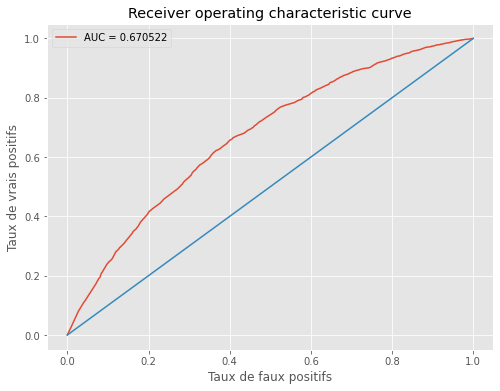

In [129]:
# graphe
probabilities = XGB_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
AUROC_GB = roc_auc_score(y_test, probabilities)               
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)                                        
plt.plot([0, 1], [0, 1])                                 
plt.title('Receiver operating characteristic curve')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(["AUC = %.6f"%AUROC_GB])
plt.show()

In [130]:
idx = np.min(np.where(tpr > 0.95)) 

print("Sensibilité : {:.2f}".format(tpr[idx]))
print("Spécificité : {:.2f}".format(1-fpr[idx]))
print("Seuil : {:.2f}".format(thresholds[idx]))

Sensibilité : 0.95
Spécificité : 0.16
Seuil : 0.22


### Comparaison bayésienne

In [131]:
AUROC_BA=roc_auc_score(y_test, clf_dummy_sm.predict_proba(X_test)[:, 1])
AUROC_BA

0.5

### Features importances avec Gradient Boosting

In [132]:
# Selection de features importants
vars_impgb = pd.Series(XGB_model.feature_importances_, index = X_train.columns).sort_values(ascending=False)
vars_impgb

EXT_SOURCE_2                                         0.203053
EXT_SOURCE_3                                         0.153477
GOODS_PRICE_CREDIT_PER                               0.143146
CODE_GENDER                                          0.100010
NAME_EDUCATION_TYPE_Higher education                 0.093937
EXT_SOURCE_1                                         0.089286
FLAG_PHONE                                           0.081050
FLAG_OWN_CAR                                         0.077649
DAYS_LAST_PHONE_CHANGE                               0.058391
OCCUPATION_TYPE_Cooking staff                        0.000000
OCCUPATION_TYPE_Cleaning staff                       0.000000
NAME_HOUSING_TYPE_With parents                       0.000000
NAME_HOUSING_TYPE_Rented apartment                   0.000000
NAME_HOUSING_TYPE_Office apartment                   0.000000
NAME_HOUSING_TYPE_Municipal apartment                0.000000
NAME_HOUSING_TYPE_House / apartment                  0.000000
NAME_FAM

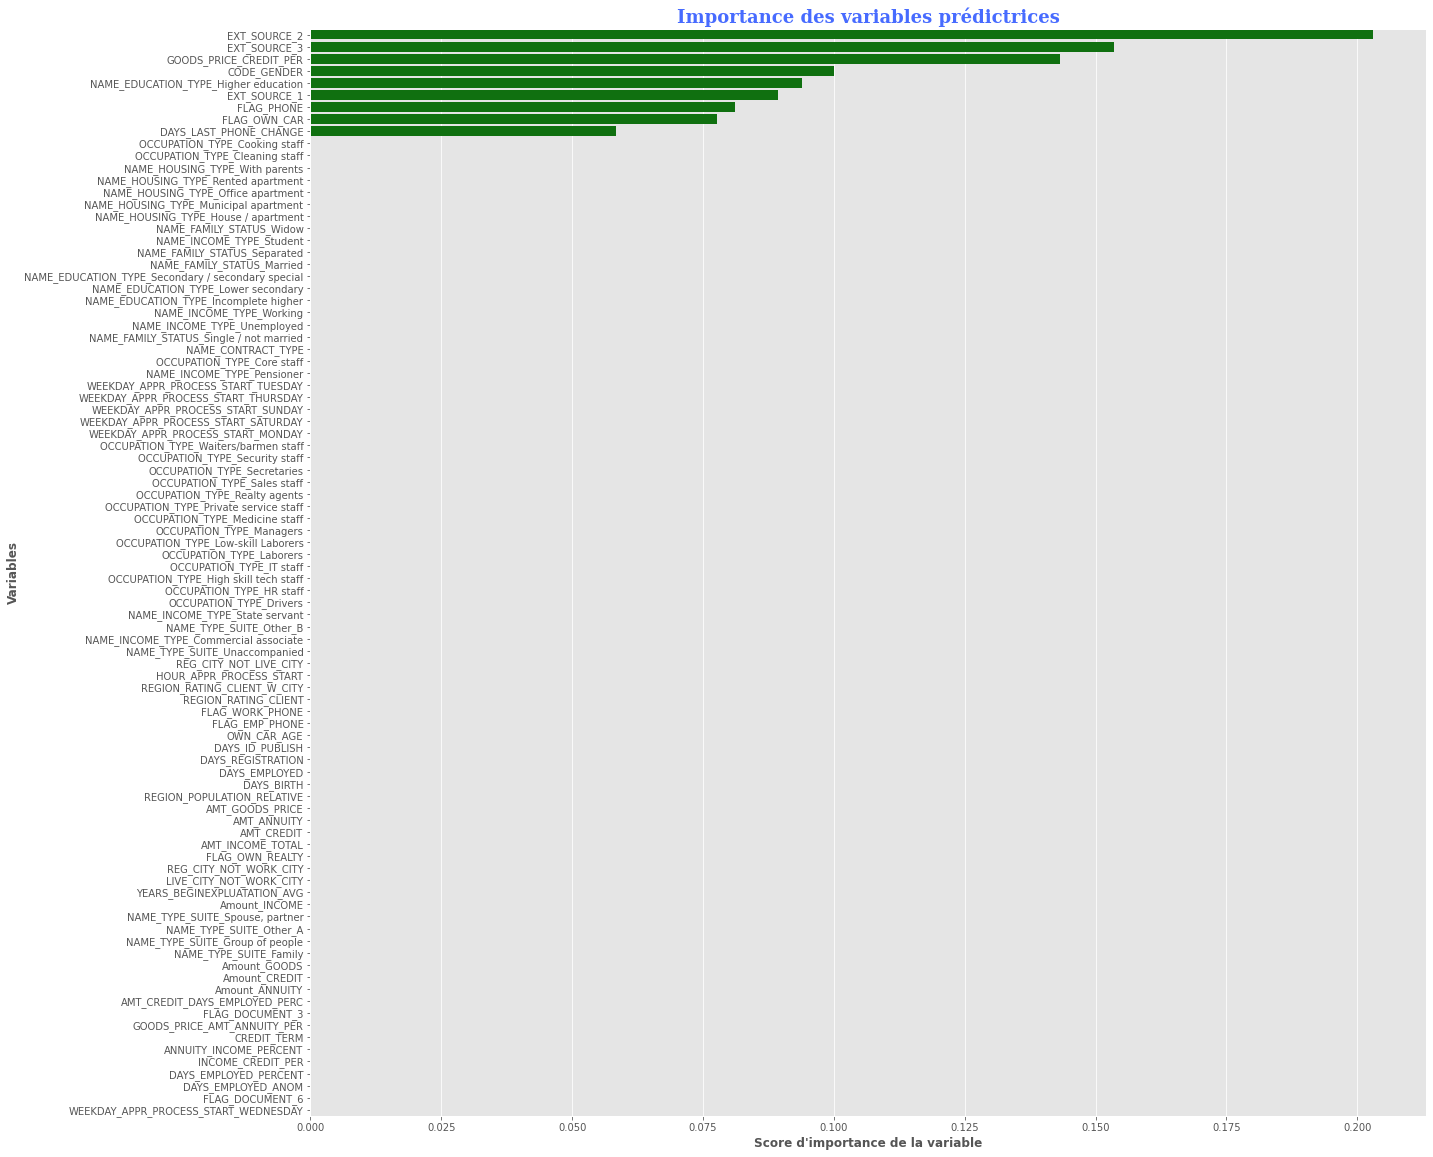

In [133]:
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}

# Visualisation des variables importantes
plt.figure(figsize=(20,20))
sns.barplot(x=vars_impgb, y=vars_impgb.index, color='green')
plt.xlabel("Score d'importance de la variable", fontweight="bold")
plt.ylabel('Variables', fontweight="bold")
plt.title("Importance des variables prédictrices", fontdict=font_title)
plt.show()

# Choix du modèle final

In [134]:
# Le score des quatres modèles
score_reg, score_decision, score_random, score_boosting

(0.6373269677680105,
 0.5919975750227342,
 0.6162789229059311,
 0.6246526725270284)

In [135]:
# le roc curve et l'AUC
AUROC_RL, AUROC_DT, AUROC_RF, AUROC_GB

(0.7105057473937675,
 0.6370403129343414,
 0.7022665968420809,
 0.6705217287857526)

In [136]:
# Les précisions
precision_RL, precision_DT, precision_RF, precision_XGB

(0.5483297331500513,
 0.8211363487595732,
 0.8346097619515175,
 0.6785254522048395)

In [137]:
# Les rappels(recall)
rappel_RL, rappel_DT, rappel_RF, rappel_XGB

(0.7596491228070176,
 0.27705802968960863,
 0.31619433198380564,
 0.5506072874493927)

In [138]:
# Convertir les résultats sous forme de dataframes
resultat=pd.DataFrame({'Modèle': ['Regréssion Logistique', 'Decision Tree', 'Random Forest','XG Boost'],'Score':[score_reg*100, score_decision*100, score_random*100, score_boosting*100],
                      'AUROC':[AUROC_RL*100, AUROC_DT*100, AUROC_RF*100, AUROC_GB*100],'Précision':[precision_RL*100,precision_DT*100, precision_RF*100, precision_XGB*100],'Rappel':[rappel_RL*100, rappel_DT*100, rappel_RF*100, rappel_XGB*100]})

In [139]:
# Affichage du dataframe
resultat

Modèle      Score      AUROC  Précision     Rappel
0  Regréssion Logistique  63.732697  71.050575  54.832973  75.964912
1          Decision Tree  59.199758  63.704031  82.113635  27.705803
2          Random Forest  61.627892  70.226660  83.460976  31.619433
3               XG Boost  62.465267  67.052173  67.852545  55.060729

In [140]:
#Annulez le pivotement d'un DataFrame du format large au format long, 
#en laissant éventuellement les identifiants définis.
comparaison_score_melt = pd.melt(resultat.reset_index(), id_vars = ['Modèle'], value_name = 'Comparaison',value_vars=['Score','AUROC','Précision','Rappel'])

In [141]:
# Affichage
comparaison_score_melt

Modèle   variable  Comparaison
0   Regréssion Logistique      Score    63.732697
1           Decision Tree      Score    59.199758
2           Random Forest      Score    61.627892
3                XG Boost      Score    62.465267
4   Regréssion Logistique      AUROC    71.050575
5           Decision Tree      AUROC    63.704031
6           Random Forest      AUROC    70.226660
7                XG Boost      AUROC    67.052173
8   Regréssion Logistique  Précision    54.832973
9           Decision Tree  Précision    82.113635
10          Random Forest  Précision    83.460976
11               XG Boost  Précision    67.852545
12  Regréssion Logistique     Rappel    75.964912
13          Decision Tree     Rappel    27.705803
14          Random Forest     Rappel    31.619433
15               XG Boost     Rappel    55.060729

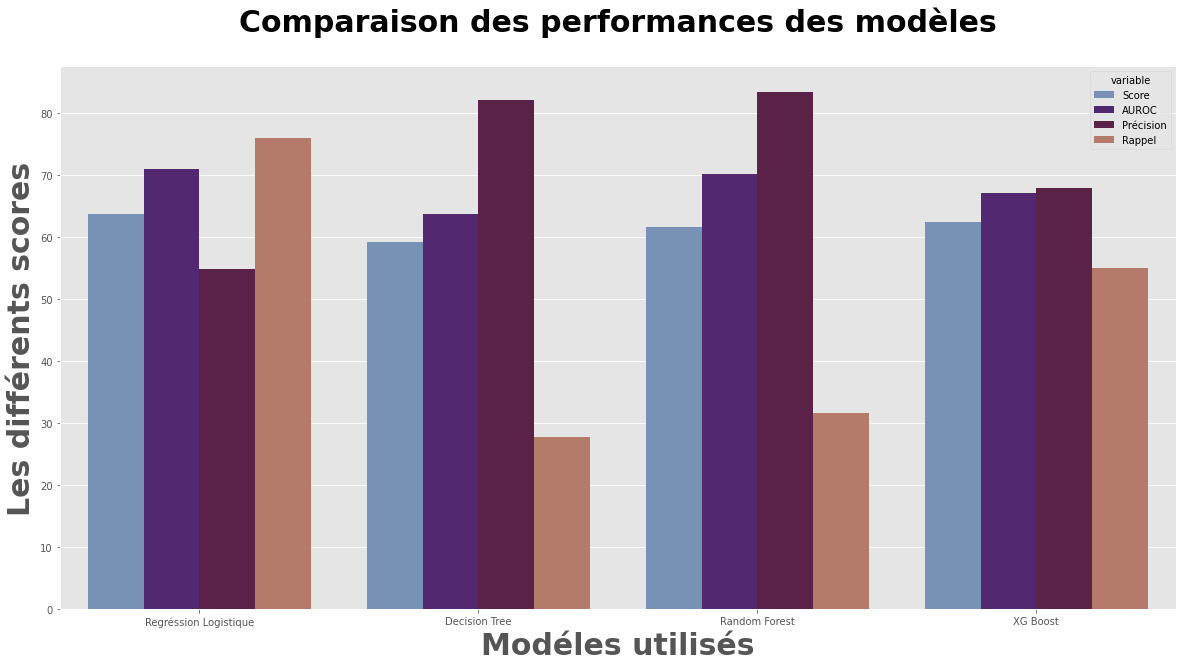

In [142]:
plt.figure(figsize=(20,10))
sns.barplot(x = comparaison_score_melt['Modèle'],
            y = comparaison_score_melt['Comparaison'], hue = comparaison_score_melt['variable'],palette='twilight');
plt.xlabel('Modéles utilisés',fontsize = 30, fontweight = 'bold')  
plt.ylabel('Les différents scores',fontsize = 30, fontweight = 'bold')          
plt.title('Comparaison des performances des modèles',fontsize = 30, pad = 35, fontweight = 'bold');

D'aprés le résultat des différentes scores obtenues avec les différentes modèles de machine leraning, nous pouvons choisir notre modéle final qui est le Gradient Boosting

In [143]:
# Afficher les meilleurs estimateur de notre modèle
XGB_model = XGB_grid.best_estimator_
XGB_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [144]:
# Afficher les meilleurs estimateur de notre modèle
rf_model = rf_grid.best_estimator_
rf_model

RandomForestClassifier(max_depth=13, min_samples_split=10, n_estimators=50,
                       random_state=1)

In [145]:
lr_model = lr_grid.best_estimator_
lr_model

LogisticRegression(C=3.727593720314938e-09, class_weight='balanced',
                   max_iter=400)

# **Boîte à moustaches sur le jeu de Test**

[0.73 0.74 0.73 0.74 0.73]
0.7328812017246522
0.0044802806871409315


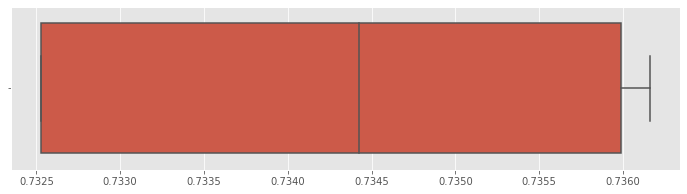

In [147]:
from sklearn.model_selection import cross_val_score
LR = LogisticRegression(C=2.275845926074791e-08, class_weight='balanced',
                   max_iter=400)
scores = cross_val_score(LR, X_train_sm, y_train_sm, cv=5, scoring = 'roc_auc')
print(scores.round(2))
print(scores.mean())
print(scores.std(ddof=1))
plt.figure(figsize=[12,3])
sns.boxplot(scores, orient = "h", sym = "")
plt.show()

In [149]:
#on entraine le modéle sur notre base d'entrainement avec les valeurs 
#en vue de faire le deploiement 
#%%time
LR_model = LogisticRegression(C=2.275845926074791e-08, class_weight='balanced',
                   max_iter=400)

LR_model.fit(X_train_sm,y_train_sm)

LogisticRegression(C=2.275845926074791e-08, class_weight='balanced',
                   max_iter=400)

In [151]:
# Calculer le score de précision et prédire les valeurs cibles
score = LR_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
y_predict = LR_model.predict_proba(X_test)[:,1]

Test score: 66.07 %


## Choix du seuil avec le modèle final

Text(0.5, 1.0, 'le meilleur seuil de probabilité')

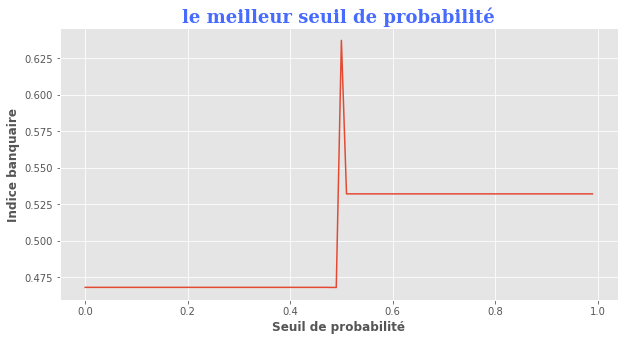

In [153]:
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}

y_pred_proba_final_lr = lr_model.predict_proba(X_test)[:, 1]
scores = []
j=[]
for i in list(np.arange(0,1.0,0.01)):
    y_pred = (y_pred_proba_final_lr >= i).astype(int)
    j.append(i)
    score = customScore(y_test,y_pred) 
    scores.append(score)

plt.figure(figsize=(10,5)) 
plt.plot(j, scores)
#plt.axvline(x=0.4, color='darkgreen')
plt.xlabel("Seuil de probabilité", fontweight="bold")
plt.ylabel("Indice banquaire", fontweight="bold")
plt.title('le meilleur seuil de probabilité', fontdict=font_title) 

## Evolution du gain en fonction du seuil de solvabilité

Text(0.5, 1.0, 'le meilleur seuil de probabilité')

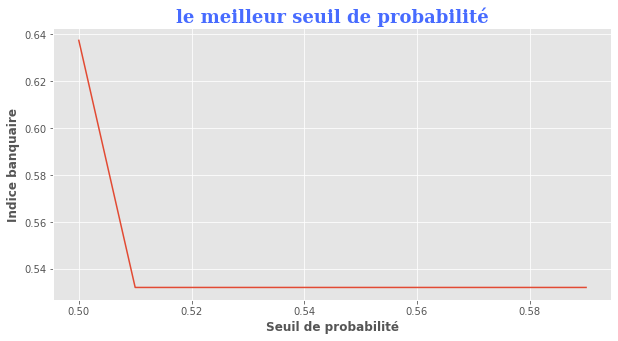

In [155]:
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}

y_pred_proba_final_lr = lr_model.predict_proba(X_test)[:, 1]
scores = []
j=[]
for i in list(np.arange(0.5,0.6,0.01)):
    y_pred = (y_pred_proba_final_lr >= i).astype(int)
    j.append(i)
    score = customScore(y_test,y_pred) 
    scores.append(score)

plt.figure(figsize=(10,5)) 
plt.plot(j, scores)
#plt.axvline(x=0.4, color='darkgreen')
plt.xlabel("Seuil de probabilité", fontweight="bold")
plt.ylabel("Indice banquaire", fontweight="bold")
plt.title('le meilleur seuil de probabilité', fontdict=font_title) 

### Matrice de confusion aprés le seuil optimal

Text(33.0, 0.5, 'Classe réelle')

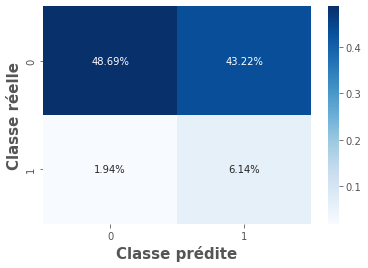

In [239]:
#cmap='Blues'
r = lr_model.predict_proba(X_test)[:,1]
y_pred_lr = np.array(r>0.5,dtype=int)
                     
confu_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(confu_matrix/np.sum(confu_matrix), annot=True, cmap='Blues',
            fmt='.2%')
plt.xlabel('Classe prédite',fontsize = 15, fontweight = 'bold')
plt.ylabel('Classe réelle',fontsize = 15, fontweight = 'bold')

In [240]:
# Rapport de classification
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.53      0.68     84252
           1       0.12      0.76      0.21      7410

    accuracy                           0.55     91662
   macro avg       0.54      0.64      0.45     91662
weighted avg       0.89      0.55      0.65     91662



### Features importantes

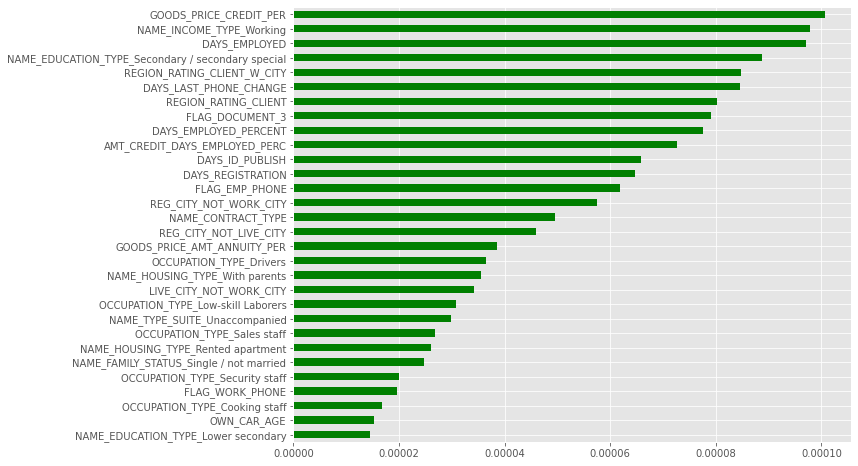

In [166]:
plt.figure(figsize=(10,8))
feat_importances_lr = pd.Series(lr_model.coef_[0], index = X_train.columns)
feat = feat_importances_lr.nlargest(30).sort_values().plot(kind='barh',color='green')

# Enregistrement et déploiement du modéle

In [168]:
# Entraînement du modèle final
Final_model_lr = LogisticRegression(C=2.275845926074791e-08, class_weight='balanced',
                   max_iter=400)
Final_model_lr.fit(X_train_sm, y_train_sm)

LogisticRegression(C=2.275845926074791e-08, class_weight='balanced',
                   max_iter=400)

In [170]:
# Sauvegarde du modèle 
import pickle
pickle.dump(Final_model_lr, open("Credit_model_reg.pkl", "wb"))

In [172]:
# Chargement du modèle pour faire de nouvelles prédictions
pickle_model_lr = pickle.load(open("Credit_model_reg.pkl", "rb"))

In [174]:
# Calculer le score de précision et prédire les valeurs cibles
score = Final_model_lr.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
y_predict = Final_model_lr.predict_proba(X_test)[:,1]

Test score: 66.07 %


# Interpretation du modéle sur les données test

## Traitement base clients

Nous avons conservé ces données pour faire de nouvelles prédictions quand de nouveaux clients s'ajoutent dans la base de donnéees.

In [175]:
TEST_FINAL.shape

(47801, 91)

In [176]:
# Afficher le Nom des différentes colonnes 
colnames = list(TEST_FINAL.columns)
colnames

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'DAYS_EMPLOYED_ANOM',
 'DAYS_EMPLOYED_PERCENT',
 'INCOME_CREDIT_PER',
 'ANNUITY_INCOME_PERCENT',
 'CREDIT_TERM',
 'GOODS_PRICE_CREDIT_PER',
 'GOODS_PRICE_AMT_ANNUITY_PER',
 'AMT_CREDIT_DAYS_EMPLOYED_PERC',
 'Amount_INCOME',
 'Amount_ANNUITY',
 'Amount_CREDIT',
 'Amount_GOODS',
 'NAME_TYPE_SUITE_Family',
 'NAME_TYPE_SUITE_Group of people',
 '

In [177]:
# Afficher le dataframe 
X_client=TEST_FINAL
X_client.head(5)

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100001                   1            1             0                1   
1      100005                   1            0             0                1   
2      100028                   1            1             0                1   
3      100038                   1            0             1                0   
4      100042                   1            1             1                1   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          135000.0    568800.0      20560.5         450000.0   
1           99000.0    222768.0      17370.0         180000.0   
2          315000.0   1575000.0      49018.5        1575000.0   
3          180000.0    625500.0      32067.0         625500.0   
4          270000.0    959688.0      34600.5         810000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018850       19241        -2329.0            -5170.0   
1                    0.035792       18064        -4469.0            -9118.0   
2                    0.026392       13976        -1866.0            -2000.0   
3                    0.010032       13040        -2191.0            -4000.0   
4                    0.025164       18604       -12009.0            -6116.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  \
0             -812          9.0               1                0           0   
1            -1623          9.0               1                0           0   
2            -4208          9.0               1                0           1   
3            -4262         16.0               1                1           0   
4            -2027         10.0               1                0           1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       18   
1                     2                            2                        9   
2                     2                            2                       11   
3                     2                            2                        5   
4                     2                            2                       15   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       1                        1   
4                       0                       0                        0   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  \
0      0.752614      0.789654      0.159520                       0.9732   
1      0.564990      0.291656      0.432962                       0.9816   
2      0.525734      0.509677      0.612704                       0.9970   
3      0.202145      0.425687      0.519097                       0.9816   
4      0.506442      0.628904      0.392774                       0.9821   

   DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  FLAG_DOCUMENT_6  \
0                 -1740.0                1                0   
1                     0.0                1                0   
2                 -1805.0                1                0   
3                  -821.0                1                0   
4                 -1705.0                0                0   

   DAYS_EMPLOYED_ANOM  DAYS_EMPLOYED_PERCENT  INCOME_CREDIT_PER  \
0                   0              -0.121044           0.237342   
1                   0              -0.247398           0.444409   
2                   0              -0.133515           0.200000   
3                   0              -0.168021           0.287770   
4                   0              -0.6455

In [178]:
# Conversion en base de client
X_client.head(5)

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100001                   1            1             0                1   
1      100005                   1            0             0                1   
2      100028                   1            1             0                1   
3      100038                   1            0             1                0   
4      100042                   1            1             1                1   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          135000.0    568800.0      20560.5         450000.0   
1           99000.0    222768.0      17370.0         180000.0   
2          315000.0   1575000.0      49018.5        1575000.0   
3          180000.0    625500.0      32067.0         625500.0   
4          270000.0    959688.0      34600.5         810000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018850       19241        -2329.0            -5170.0   
1                    0.035792       18064        -4469.0            -9118.0   
2                    0.026392       13976        -1866.0            -2000.0   
3                    0.010032       13040        -2191.0            -4000.0   
4                    0.025164       18604       -12009.0            -6116.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  \
0             -812          9.0               1                0           0   
1            -1623          9.0               1                0           0   
2            -4208          9.0               1                0           1   
3            -4262         16.0               1                1           0   
4            -2027         10.0               1                0           1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       18   
1                     2                            2                        9   
2                     2                            2                       11   
3                     2                            2                        5   
4                     2                            2                       15   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       1                        1   
4                       0                       0                        0   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  \
0      0.752614      0.789654      0.159520                       0.9732   
1      0.564990      0.291656      0.432962                       0.9816   
2      0.525734      0.509677      0.612704                       0.9970   
3      0.202145      0.425687      0.519097                       0.9816   
4      0.506442      0.628904      0.392774                       0.9821   

   DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  FLAG_DOCUMENT_6  \
0                 -1740.0                1                0   
1                     0.0                1                0   
2                 -1805.0                1                0   
3                  -821.0                1                0   
4                 -1705.0                0                0   

   DAYS_EMPLOYED_ANOM  DAYS_EMPLOYED_PERCENT  INCOME_CREDIT_PER  \
0                   0              -0.121044           0.237342   
1                   0              -0.247398           0.444409   
2                   0              -0.133515           0.200000   
3                   0              -0.168021           0.287770   
4                   0              -0.6455

In [179]:
X_client = X_client.drop(columns = ["SK_ID_CURR"])

In [180]:
# Standardisation
scaler = StandardScaler()
scaler.fit(X_client)
Xclient_scale = pd.DataFrame(scaler.transform(X_client), columns = X_client.columns)
Xclient_scale.head(5)

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0            0.096165     0.701467     -0.713084         0.673714   
1            0.096165    -1.425584     -0.713084         0.673714   
2            0.096165     0.701467     -0.713084         0.673714   
3            0.096165    -1.425584      1.402359        -1.484310   
4            0.096165     0.701467      1.402359         0.673714   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0         -0.428149    0.142061    -0.554215        -0.038212   
1         -0.783181   -0.805095    -0.753501        -0.840201   
2          1.347011    2.896226     1.223334         3.303409   
3          0.015641    0.297260     0.164506         0.483081   
4          0.903221    1.211998     0.322754         1.031107   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                   -0.164321    0.735917       0.005995          -0.056597   
1                    1.009248    0.463587      -1.014865          -1.167676   
2                    0.358112   -0.482278       0.226863           0.835530   
3                   -0.775142   -0.698846       0.071826           0.272674   
4                    0.273049    0.588530      -4.611727          -0.322828   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  \
0         1.426591    -0.138646        0.483559        -0.509912   -0.599123   
1         0.909738    -0.138646        0.483559        -0.509912   -0.599123   
2        -0.737692    -0.138646        0.483559        -0.509912    1.669107   
3        -0.772107     0.893847        0.483559         1.961124   -0.599123   
4         0.652267     0.008853        0.483559        -0.509912    1.669107   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0             -0.073074                    -0.024564                 1.826710   
1             -0.073074                    -0.024564                -0.918351   
2             -0.073074                    -0.024564                -0.308338   
3             -0.073074                    -0.024564                -2.138378   
4             -0.073074                    -0.024564                 0.911690   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0               -0.289949               -0.538712                -0.459592   
1               -0.289949               -0.538712                -0.459592   
2               -0.289949               -0.538712                -0.459592   
3               -0.289949                1.856281                 2.175841   
4               -0.289949               -0.538712                -0.459592   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  \
0      1.597167      1.498788     -1.997495                    -0.198352   
1      0.395192     -1.246866     -0.408147                     0.040391   
2      0.143706     -0.044832      0.636584                     0.478086   
3     -1.929296     -0.507899      0.092505                     0.040391   
4      0.020116      0.612513     -0.641734                     0.054602   

   DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  FLAG_DOCUMENT_6  \
0               -0.753569         0.520803        -0.308988   
1                1.227226         0.520803        -0.308988   
2               -0.827564         0.520803        -0.308988   
3                0.292610         0.520803        -0.308988   
4               -0.713726        -1.920113        -0.308988   

   DAYS_EMPLOYED_ANOM  DAYS_EMPLOYED_PERCENT  INCOME_CREDIT_PER  \
0                 0.0               0.219801          -0.617781   
1                 0.0              -0.801263          -0.109694   
2                 0.0               0.119023          -0.709408   
3                 0.0              -0.159825          -0.494044   
4                 0.0              -4.018354          -0.509817   

   ANNUITY_INCOME_PERCENT  CREDIT_TERM  GOODS_

In [181]:
# Sauvegarde du dataframe
Xclient_scale.to_csv('Base_Clients_scale.csv', index=False)

In [183]:
# Calculons la probrabilité sur la base des client
probabilities_lr = pickle_model_lr.predict_proba(Xclient_scale)[:,1]

In [185]:
df=pd.DataFrame()
df['predict'] = probabilities_lr

In [186]:
TEST_FINAL['Score']=probabilities_lr

In [187]:
TEST_FINAL['LABELS']=np.array(TEST_FINAL['Score']>0.5,dtype=int)

In [188]:
TEST_FINAL.head(5)

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100001                   1            1             0                1   
1      100005                   1            0             0                1   
2      100028                   1            1             0                1   
3      100038                   1            0             1                0   
4      100042                   1            1             1                1   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          135000.0    568800.0      20560.5         450000.0   
1           99000.0    222768.0      17370.0         180000.0   
2          315000.0   1575000.0      49018.5        1575000.0   
3          180000.0    625500.0      32067.0         625500.0   
4          270000.0    959688.0      34600.5         810000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018850       19241        -2329.0            -5170.0   
1                    0.035792       18064        -4469.0            -9118.0   
2                    0.026392       13976        -1866.0            -2000.0   
3                    0.010032       13040        -2191.0            -4000.0   
4                    0.025164       18604       -12009.0            -6116.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  \
0             -812          9.0               1                0           0   
1            -1623          9.0               1                0           0   
2            -4208          9.0               1                0           1   
3            -4262         16.0               1                1           0   
4            -2027         10.0               1                0           1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       18   
1                     2                            2                        9   
2                     2                            2                       11   
3                     2                            2                        5   
4                     2                            2                       15   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       1                        1   
4                       0                       0                        0   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  \
0      0.752614      0.789654      0.159520                       0.9732   
1      0.564990      0.291656      0.432962                       0.9816   
2      0.525734      0.509677      0.612704                       0.9970   
3      0.202145      0.425687      0.519097                       0.9816   
4      0.506442      0.628904      0.392774                       0.9821   

   DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  FLAG_DOCUMENT_6  \
0                 -1740.0                1                0   
1                     0.0                1                0   
2                 -1805.0                1                0   
3                  -821.0                1                0   
4                 -1705.0                0                0   

   DAYS_EMPLOYED_ANOM  DAYS_EMPLOYED_PERCENT  INCOME_CREDIT_PER  \
0                   0              -0.121044           0.237342   
1                   0              -0.247398           0.444409   
2                   0              -0.133515           0.200000   
3                   0              -0.168021           0.287770   
4                   0              -0.6455

In [189]:
# Sauvegarde du dataframe
TEST_FINAL.to_csv('Base_Clients_Labels.csv', index=False)

## Expliquer les prédictions

### explainerdashboard

* explainerdashboard est une bibliothèque permettant de créer rapidement des tableaux de bord interactifs pour analyser et expliquer les prédictions et le fonctionnement des modèles d'apprentissage automatique
* Il vous permet d'étudier les valeurs SHAP, les importances de permutation, les effets d'interaction, les diagrammes de dépendance partielle, toutes sortes de diagrammes de performances et même des arbres de décision individuels à l'intérieur d'une forêt aléatoire.

In [190]:
#!pip install explainerdashboard

In [191]:
#from explainerdashboard import ClassifierExplainer, ExplainerDashboard
#explainer=ClassifierExplainer(RF_model, X_test, y_test)

In [192]:
#ExplainerDashboard(explainer).run()

### LIME

L’interprétation des modèles d’apprentissage automatique est devenue d’une importance primordiale de nos jours, car nous gérons de grands ensembles de données et des types de données complexes tels que l’image, l’audio, le texte, les données structurées avec des milliers de fonctionnalités, etc.

https://coderzcolumn.com/tutorials/machine-learning/how-to-use-lime-to-understand-sklearn-models-predictions

*Séparation des clients en défaut de paiement et pas en défaut de payement en se basant sur le score

In [196]:
defaut= TEST_FINAL[TEST_FINAL["Score"] > 0.5]
defaut.head(10)

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
1       100005                   1            0             0   
3       100038                   1            0             1   
6       100065                   1            0             0   
10      100090                   1            1             0   
11      100091                   1            1             0   
12      100092                   1            1             1   
14      100107                   1            0             1   
17      100128                   1            1             1   
24      100172                   1            1             0   
31      100241                   1            1             0   

    FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1                 1           99000.0    222768.0      17370.0   
3                 0          180000.0    625500.0      32067.0   
6                 1          166500.0    180000.0      14220.0   
10                1          135000.0    261621.0      16848.0   
11                1          247500.0    296280.0      23539.5   
12                1           90000.0    360000.0      18535.5   
14                1          180000.0    296280.0      21690.0   
17                1          225000.0    431280.0      23526.0   
24                1           76500.0    225000.0      12334.5   
31                0           67500.0    431280.0      17797.5   

    AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
1          180000.0                    0.035792       18064        -4469.0   
3          625500.0                    0.010032       13040        -2191.0   
6          180000.0                    0.005144        9516        -1387.0   
10         216000.0                    0.008019       15524        -3555.0   
11         225000.0                    0.018634       12278         -929.0   
12         360000.0                    0.014520       19687        -3578.0   
14         225000.0                    0.032561       13563        -1007.0   
17         360000.0                    0.025164       10962        -1883.0   
24         225000.0                    0.010966       15394         -967.0   
31         360000.0                    0.015221        9187         -270.0   

    DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  \
1             -9118.0            -1623          9.0               1   
3             -4000.0            -4262         16.0               1   
6             -5063.0            -2055          9.0               1   
10            -7833.0            -3985          9.0               1   
11            -6031.0            -4586          9.0               1   
12           -10673.0            -3183          3.0               1   
14            -5719.0            -4044         14.0               1   
17              -99.0            -1721          8.0               1   
24            -5389.0            -5433          9.0               1   
31            -3663.0             -725          9.0               1   

    FLAG_WORK_PHONE  FLAG_PHONE  REGION_RATING_CLIENT  \
1                 0           0                     2   
3                 1           0                     2   
6                 1           1                     2   
10                0           0                     2   
11                0           0                     2   
12                0           0                     2   
14                0           0                     1   
17                0           0                     2   
24                0           0                     2   
31                1           0                     2   

    REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
1                             2                        9   
3                             2                        5   
6                             2                        7   
10                            2                     

In [197]:
defaut.shape

(17502, 93)

In [198]:
defaut.loc[[421]]

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
421      102987                   1            0             1   

     FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
421                1          225000.0    688500.0      35284.5   

     AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
421         688500.0                    0.014464       12197        -2863.0   

     DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  \
421             -483.0            -2549          6.0               1   

     FLAG_WORK_PHONE  FLAG_PHONE  REGION_RATING_CLIENT  \
421                0           0                     2   

     REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
421                            2                        6   

     REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
421                       0                       0                        0   

     EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  \
421      0.235725       0.32205      0.266457                       0.9816   

     DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  FLAG_DOCUMENT_6  \
421                 -1351.0                0                0   

     DAYS_EMPLOYED_ANOM  DAYS_EMPLOYED_PERCENT  INCOME_CREDIT_PER  \
421                   0               -0.23473           0.326797   

     ANNUITY_INCOME_PERCENT  CREDIT_TERM  GOODS_PRICE_CREDIT_PER  \
421                6.376738     0.051248                     1.0   

     GOODS_PRICE_AMT_ANNUITY_PER  AMT_CREDIT_DAYS_EMPLOYED_PERC  \
421                     0.051248                      -0.004158   

     Amount_INCOME  Amount_ANNUITY  Amount_CREDIT  Amount_GOODS  \
421      12.323856       10.471199      13.442271     13.442271   

     NAME_TYPE_SUITE_Family  ...  NAME_INCOME_TYPE_Commercial associate  \
421                       0  ...                                      0   

     NAME_INCOME_TYPE_Pensioner  NAME_INCOME_TYPE_State servant  \
421                           0                               1   

     NAME_INCOME_TYPE_Student  NAME_INCOME_TYPE_Unemployed  \
421                         0                            0   

     NAME_INCOME_TYPE_Working  NAME_EDUCATION_TYPE_Higher education  \
421                         0                                     0   

     NAME_EDUCATION_TYPE_Incomplete higher  \
421                                      0   

     NAME_EDUCATION_TYPE_Lower secondary  \
421                                    0   

     NAME_EDUCATION_TYPE_Secondary / secondary special  \
421                                                  1   

     NAME_FAMILY_STATUS_Married  NAME_FAMILY_STATUS_Separated  \
421                           1                             0   

     NAME_FAMILY_STATUS_Single / not married  NAME_FAMILY_STATUS_Widow  \
421                                        0                         0   

     NAME_HOUSING_TYPE_House / apartment  \
421                                    0   

     NAME_HOUSING_TYPE_Municipal apartment  \
421                                      0   

     NAME_HOUSING_TYPE_Office apartment  NAME_HOUSING_TYPE_Rented apartment  \
421                                   0                                   1   

     NAME_HOUSING_TYPE_With parents  OCCUPATION_TYPE_Cleaning staff  \
421                               0                               0   

     OCCUPATION_TYPE_Cooking staff  OCCUPATION_TYPE_Core staff  \
421                              0                           0   

     OCCUPATION_TYPE_Drivers  OCCUPATION_TYPE_HR staff  \
421                        0                         0   

     OCCUPATION_TYPE_High skill tech staff  OCCUPATION_TYPE_IT staff  \
421                                      0                         0   

     OCCUPATION_TYPE_Laborers  OCCUPATION_TYPE_Low-skill Laborers  \
421                         0                                   0   

     OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_

In [218]:
non_defaut= TEST_FINAL[TEST_FINAL["Score"] < 0.5]
non_defaut.head(10)

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0       100001                   1            1             0   
2       100028                   1            1             0   
4       100042                   1            1             1   
5       100057                   1            0             1   
7       100066                   1            1             0   
8       100067                   1            1             1   
9       100074                   1            1             0   
13      100106                   0            0             0   
15      100109                   1            1             1   
16      100117                   1            0             1   

    FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 1          135000.0    568800.0      20560.5   
2                 1          315000.0   1575000.0      49018.5   
4                 1          270000.0    959688.0      34600.5   
5                 1          180000.0    499221.0      22117.5   
7                 1          315000.0    364896.0      28957.5   
8                 1          162000.0     45000.0       5337.0   
9                 1           67500.0    675000.0      25447.5   
13                1          180000.0    157500.0       7875.0   
15                1          202500.0    407520.0      26041.5   
16                1           90000.0    499221.0      22117.5   

    AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0          450000.0                    0.018850       19241        -2329.0   
2         1575000.0                    0.026392       13976        -1866.0   
4          810000.0                    0.025164       18604       -12009.0   
5          373500.0                    0.022800       16685        -2580.0   
7          315000.0                    0.046220       12744        -1013.0   
8           45000.0                    0.018634       10395        -2625.0   
9          675000.0                    0.003122       23670        -1765.0   
13         157500.0                    0.031329       12091        -1830.0   
15         360000.0                    0.007020       19375        -4739.0   
16         373500.0                    0.003122       22705        -1765.0   

    DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  \
0             -5170.0             -812          9.0               1   
2             -2000.0            -4208          9.0               1   
4             -6116.0            -2027         10.0               1   
5            -10125.0             -241          3.0               1   
7             -1686.0            -3171          9.0               1   
8             -8124.0            -3041          5.0               1   
9             -7490.0            -4136          9.0               0   
13            -1042.0            -4221          9.0               1   
15            -3035.0            -2895         11.0               1   
16            -5107.0            -5990         15.0               0   

    FLAG_WORK_PHONE  FLAG_PHONE  REGION_RATING_CLIENT  \
0                 0           0                     2   
2                 0           1                     2   
4                 0           1                     2   
5                 0           0                     2   
7                 0           0                     1   
8                 1           1                     2   
9                 0           1                     3   
13                0           0                     2   
15                1           0                     2   
16                0           0                     3   

    REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                             2                       18   
2                             2                       11   
4                             2                       15   
5                             2                     

In [219]:
non_defaut.shape

(30299, 93)

In [201]:
TEST_FINAL.loc[[421]]

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
421      102987                   1            0             1   

     FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
421                1          225000.0    688500.0      35284.5   

     AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
421         688500.0                    0.014464       12197        -2863.0   

     DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  \
421             -483.0            -2549          6.0               1   

     FLAG_WORK_PHONE  FLAG_PHONE  REGION_RATING_CLIENT  \
421                0           0                     2   

     REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
421                            2                        6   

     REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
421                       0                       0                        0   

     EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  \
421      0.235725       0.32205      0.266457                       0.9816   

     DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  FLAG_DOCUMENT_6  \
421                 -1351.0                0                0   

     DAYS_EMPLOYED_ANOM  DAYS_EMPLOYED_PERCENT  INCOME_CREDIT_PER  \
421                   0               -0.23473           0.326797   

     ANNUITY_INCOME_PERCENT  CREDIT_TERM  GOODS_PRICE_CREDIT_PER  \
421                6.376738     0.051248                     1.0   

     GOODS_PRICE_AMT_ANNUITY_PER  AMT_CREDIT_DAYS_EMPLOYED_PERC  \
421                     0.051248                      -0.004158   

     Amount_INCOME  Amount_ANNUITY  Amount_CREDIT  Amount_GOODS  \
421      12.323856       10.471199      13.442271     13.442271   

     NAME_TYPE_SUITE_Family  ...  NAME_INCOME_TYPE_Commercial associate  \
421                       0  ...                                      0   

     NAME_INCOME_TYPE_Pensioner  NAME_INCOME_TYPE_State servant  \
421                           0                               1   

     NAME_INCOME_TYPE_Student  NAME_INCOME_TYPE_Unemployed  \
421                         0                            0   

     NAME_INCOME_TYPE_Working  NAME_EDUCATION_TYPE_Higher education  \
421                         0                                     0   

     NAME_EDUCATION_TYPE_Incomplete higher  \
421                                      0   

     NAME_EDUCATION_TYPE_Lower secondary  \
421                                    0   

     NAME_EDUCATION_TYPE_Secondary / secondary special  \
421                                                  1   

     NAME_FAMILY_STATUS_Married  NAME_FAMILY_STATUS_Separated  \
421                           1                             0   

     NAME_FAMILY_STATUS_Single / not married  NAME_FAMILY_STATUS_Widow  \
421                                        0                         0   

     NAME_HOUSING_TYPE_House / apartment  \
421                                    0   

     NAME_HOUSING_TYPE_Municipal apartment  \
421                                      0   

     NAME_HOUSING_TYPE_Office apartment  NAME_HOUSING_TYPE_Rented apartment  \
421                                   0                                   1   

     NAME_HOUSING_TYPE_With parents  OCCUPATION_TYPE_Cleaning staff  \
421                               0                               0   

     OCCUPATION_TYPE_Cooking staff  OCCUPATION_TYPE_Core staff  \
421                              0                           0   

     OCCUPATION_TYPE_Drivers  OCCUPATION_TYPE_HR staff  \
421                        0                         0   

     OCCUPATION_TYPE_High skill tech staff  OCCUPATION_TYPE_IT staff  \
421                                      0                         0   

     OCCUPATION_TYPE_Laborers  OCCUPATION_TYPE_Low-skill Laborers  \
421                         0                                   0   

     OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_

In [202]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [203]:
import lime

In [204]:
help("lime.lime_tabular.LimeTabularExplainer")

Help on class LimeTabularExplainer in lime.lime_tabular:

lime.lime_tabular.LimeTabularExplainer = class LimeTabularExplainer(builtins.object)
 |  lime.lime_tabular.LimeTabularExplainer(training_data, mode='classification', training_labels=None, feature_names=None, categorical_features=None, categorical_names=None, kernel_width=None, kernel=None, verbose=False, class_names=None, feature_selection='auto', discretize_continuous=True, discretizer='quartile', sample_around_instance=False, random_state=None, training_data_stats=None)
 |  
 |  Explains predictions on tabular (i.e. matrix) data.
 |  For numerical features, perturb them by sampling from a Normal(0,1) and
 |  doing the inverse operation of mean-centering and scaling, according to the
 |  means and stds in the training data. For categorical features, perturb by
 |  sampling according to the training distribution, and making a binary
 |  feature that is 1 when the value is the same as the instance being
 |  explained.
 |  
 |  Me

In [205]:
import lime
from lime import lime_tabular

In [206]:
X.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'DAYS_LAST_PHONE_CHANGE',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'DAYS_EMPLOYED_ANOM',
       'DAYS_EMPLOYED_PERCENT', 'INCOME_CREDIT_PER', 'ANNUITY_INCOME_PERCENT',
       'CREDIT_TERM', 'GOODS_PRICE_CREDIT_PER', 'GOODS_PRICE_AMT_ANNUITY_PER',
       'AMT_CREDIT_DAYS_EMPLOYED_PERC', 'Amount_INCOME', 'Amount_ANNUITY',
       'Amount_CREDIT', 'Amount_GOODS', 'NAME_TYPE_SUITE_Family'

In [207]:
X_train.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'DAYS_LAST_PHONE_CHANGE',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'DAYS_EMPLOYED_ANOM',
       'DAYS_EMPLOYED_PERCENT', 'INCOME_CREDIT_PER', 'ANNUITY_INCOME_PERCENT',
       'CREDIT_TERM', 'GOODS_PRICE_CREDIT_PER', 'GOODS_PRICE_AMT_ANNUITY_PER',
       'AMT_CREDIT_DAYS_EMPLOYED_PERC', 'Amount_INCOME', 'Amount_ANNUITY',
       'Amount_CREDIT', 'Amount_GOODS', 'NAME_TYPE_SUITE_Family'

In [208]:
explainer = lime_tabular.LimeTabularExplainer(
            training_data = X_train_sm,
            feature_names = X.columns,
            random_state= 20,
            discretize_continuous=False)

In [209]:
import dill
interpre=open('Explainer.dat','wb')
dill.dump(explainer,interpre)
interpre.close()

In [210]:
my_dill = dill.load(open('Explainer.dat', "rb"))

In [211]:
index = [[Xclient_scale.index]]
index

[[RangeIndex(start=0, stop=47801, step=1)]]

In [212]:
lime_exp = explainer.explain_instance(Xclient_scale.iloc[421],
                             pickle_model_lr.predict_proba,
                             num_samples=100)
lime_exp

In [213]:
lime_exp.show_in_notebook(show_table=True)

In [214]:
lime_exp.as_list()

[('EXT_SOURCE_2', -0.0002905369325995046),
 ('EXT_SOURCE_3', -0.00024761428350890207),
 ('DAYS_BIRTH', -0.0001792486794891942),
 ('EXT_SOURCE_1', -0.000144254283069814),
 ('FLAG_DOCUMENT_3', 0.0001282852267232377),
 ('GOODS_PRICE_CREDIT_PER', 0.0001034958078654095),
 ('NAME_HOUSING_TYPE_House / apartment', -9.695426738827975e-05),
 ('NAME_INCOME_TYPE_Working', 8.775140099294426e-05),
 ('NAME_INCOME_TYPE_State servant', -2.8122589274374284e-05),
 ('NAME_HOUSING_TYPE_Rented apartment', -6.485439475912971e-07)]

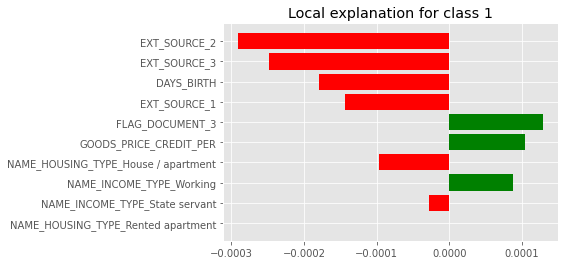

<Figure size 720x360 with 0 Axes>

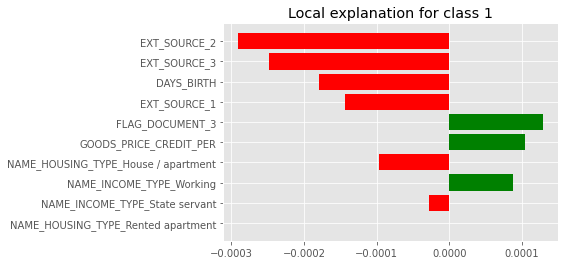

In [215]:
fig = plt.figure(figsize=(10,5)) 
lime_exp.as_pyplot_figure()
#plt.tight_layout()

In [216]:
print("Explanation Local Prediction              : ","classe 0" if lime_exp.local_pred<0.5 else "classe 1")
print("Explanation Global Prediction Probability : ", lime_exp.predict_proba)
#print("Explanation Global Prediction             : ",  y_train_sm[np.argmax(lime_exp.predict_proba)])

Explanation Local Prediction              :  classe 1
Explanation Global Prediction Probability :  [0.49952039 0.50047961]


In [220]:
print("Explanation Local Prediction              : ", lime_exp.local_pred)
print("Explanation Global Prediction Probability : ", lime_exp.predict_proba)
#print("Explanation Global Prediction             : ",  y_train_sm[np.argmax(lime_exp.predict_proba)])

Explanation Local Prediction              :  [0.50051501]
Explanation Global Prediction Probability :  [0.49952039 0.50047961]


Fonction qui permet de calculer la prédiction en donnant l'identifiant

In [237]:
def predict(ID, dataframe):
    ID = int(ID)
    Y = dataframe[dataframe['SK_ID_CURR'] == ID]
    Y = Y.drop(['Score', 'SK_ID_CURR', 'LABELS'], axis=1)
    num=np.array(scaler.transform(Y))
    pr= pickle_model_lr.predict_proba(num)[:,1]
    if pr > 0.5:
        prediction='Rejet demande de crédit'

    else:
        prediction= 'Acceptation demande de crédit'


    return prediction, (pr[0]*100).round()

In [238]:
predict(100038, TEST_FINAL)

('Rejet demande de crédit', 50.0)

In [225]:
TEST_FINAL.shape

(47801, 93)

In [226]:
data_client = pd.read_csv("Base_Clients_Labels.csv")
data_client.head(5)

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100001                   1            1             0                1   
1      100005                   1            0             0                1   
2      100028                   1            1             0                1   
3      100038                   1            0             1                0   
4      100042                   1            1             1                1   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          135000.0    568800.0      20560.5         450000.0   
1           99000.0    222768.0      17370.0         180000.0   
2          315000.0   1575000.0      49018.5        1575000.0   
3          180000.0    625500.0      32067.0         625500.0   
4          270000.0    959688.0      34600.5         810000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018850       19241        -2329.0            -5170.0   
1                    0.035792       18064        -4469.0            -9118.0   
2                    0.026392       13976        -1866.0            -2000.0   
3                    0.010032       13040        -2191.0            -4000.0   
4                    0.025164       18604       -12009.0            -6116.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  \
0             -812          9.0               1                0           0   
1            -1623          9.0               1                0           0   
2            -4208          9.0               1                0           1   
3            -4262         16.0               1                1           0   
4            -2027         10.0               1                0           1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       18   
1                     2                            2                        9   
2                     2                            2                       11   
3                     2                            2                        5   
4                     2                            2                       15   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       1                        1   
4                       0                       0                        0   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  \
0      0.752614      0.789654      0.159520                       0.9732   
1      0.564990      0.291656      0.432962                       0.9816   
2      0.525734      0.509677      0.612704                       0.9970   
3      0.202145      0.425687      0.519097                       0.9816   
4      0.506442      0.628904      0.392774                       0.9821   

   DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  FLAG_DOCUMENT_6  \
0                 -1740.0                1                0   
1                     0.0                1                0   
2                 -1805.0                1                0   
3                  -821.0                1                0   
4                 -1705.0                0                0   

   DAYS_EMPLOYED_ANOM  DAYS_EMPLOYED_PERCENT  INCOME_CREDIT_PER  \
0                   0              -0.121044           0.237342   
1                   0              -0.247398           0.444409   
2                   0              -0.133515           0.200000   
3                   0              -0.168021           0.287770   
4                   0              -0.6455

In [227]:
data_client['SK_ID_CURR']

0        100001
1        100005
2        100028
3        100038
4        100042
          ...  
47796    456221
47797    456222
47798    456223
47799    456224
47800    456250
Name: SK_ID_CURR, Length: 47801, dtype: int64

In [228]:
data_client['SK_ID_CURR'].to_csv('Identifiant_client.csv', index = False)

In [229]:
Identifiant = pd.read_csv('Identifiant_client.csv')
Identifiant

SK_ID_CURR
0          100001
1          100005
2          100028
3          100038
4          100042
...           ...
47796      456221
47797      456222
47798      456223
47799      456224
47800      456250

[47801 rows x 1 columns]

In [230]:
Xclient_new = pd.concat([Identifiant, Xclient_scale], axis = 1)
Xclient_new

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0          100001            0.096165     0.701467     -0.713084   
1          100005            0.096165    -1.425584     -0.713084   
2          100028            0.096165     0.701467     -0.713084   
3          100038            0.096165    -1.425584      1.402359   
4          100042            0.096165     0.701467      1.402359   
...           ...                 ...          ...           ...   
47796      456221            0.096165     0.701467     -0.713084   
47797      456222            0.096165     0.701467     -0.713084   
47798      456223            0.096165     0.701467      1.402359   
47799      456224            0.096165    -1.425584     -0.713084   
47800      456250            0.096165     0.701467      1.402359   

       FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0             0.673714         -0.428149    0.142061    -0.554215   
1             0.673714         -0.783181   -0.805095    -0.753501   
2             0.673714          1.347011    2.896226     1.223334   
3            -1.484310          0.015641    0.297260     0.164506   
4             0.673714          0.903221    1.211998     0.322754   
...                ...               ...         ...          ...   
47796         0.673714         -0.561286   -0.285598    -0.747036   
47797        -1.484310         -0.206254    0.288811     0.154668   
47798         0.673714          0.237536   -0.552638     0.235619   
47799        -1.484310          0.459431   -0.183117    -0.268919   
47800        -1.484310         -0.428149   -0.558748    -0.295060   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0            -0.038212                   -0.164321    0.735917       0.005995   
1            -0.840201                    1.009248    0.463587      -1.014865   
2             3.303409                    0.358112   -0.482278       0.226863   
3             0.483081                   -0.775142   -0.698846       0.071826   
4             1.031107                    0.273049    0.588530      -4.611727   
...                ...                         ...         ...            ...   
47796        -0.572871                   -1.328608    0.904590      -1.348791   
47797         0.095453                    1.009248   -1.127817       0.568899   
47798        -0.439206                    0.358112   -0.032020      -0.331747   
47799        -0.038212                   -0.164321   -0.484129      -0.185774   
47800        -0.572871                   -1.010867   -0.485517       0.815051   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  \
0              -0.056597         1.426591    -0.138646        0.483559   
1              -1.167676         0.909738    -0.138646        0.483559   
2               0.835530        -0.737692    -0.138646        0.483559   
3               0.272674        -0.772107     0.893847        0.483559   
4              -0.322828         0.652267     0.008853        0.483559   
...                  ...              ...          ...             ...   
47796          -1.160921        -0.222114    -0.138646        0.483559   
47797           0.549880         0.030259    -0.138646        0.483559   
47798           0.643877         0.985577    -0.876142        0.483559   
47799           0.987220         1.074799    -0.138646        0.483559   
47800           1.096695        -0.745340     1.778842        0.483559   

       FLAG_WORK_PHONE  FLAG_PHONE  REGION_RATING_CLIENT  \
0            -0.509912   -0.599123             -0.073074   
1            -0.509912   -0.599123             -0.073074   
2            -0.509912    1.669107             -0.073074   
3             1.961124   -0.599123             -0.073074   
4            -0.509912    1.669107             -0.073074   
...                ...         ...                   ...   
47796         1.961124    1.669107              1.838810   
47797        -0.509

In [231]:
# Sauvegarde du dataframe
Xclient_new.to_csv('TEST_FINAL_SCALE.csv', index=False)

In [232]:
data_client['SK_ID_CURR'] == 421

0        False
1        False
2        False
3        False
4        False
         ...  
47796    False
47797    False
47798    False
47799    False
47800    False
Name: SK_ID_CURR, Length: 47801, dtype: bool

In [233]:
j = data_client['SK_ID_CURR'] == 421
data_client[j]['AMT_ANNUITY']

Series([], Name: AMT_ANNUITY, dtype: float64)

In [234]:
data_client[j].select_dtypes(['float64','int64']).columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'DAYS_EMPLOYED_ANOM', 'DAYS_EMPLOYED_PERCENT', 'INCOME_CREDIT_PER',
       'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'GOODS_PRICE_CREDIT_PER',
       'GOODS_PRICE_AMT_ANNUITY_PER', 'AMT_CREDIT_DAYS_EMPLOYED_PERC',
       'Amount_INCOME', 'Amount_ANNUITY', 'Amount_CREDIT', 'Amount_GOODS',
       'NA

In [235]:
data_client[data_client[j].columns]

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0          100001                   1            1             0   
1          100005                   1            0             0   
2          100028                   1            1             0   
3          100038                   1            0             1   
4          100042                   1            1             1   
...           ...                 ...          ...           ...   
47796      456221                   1            1             0   
47797      456222                   1            1             0   
47798      456223                   1            1             1   
47799      456224                   1            0             0   
47800      456250                   1            1             1   

       FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                    1          135000.0    568800.0      20560.5   
1                    1           99000.0    222768.0      17370.0   
2                    1          315000.0   1575000.0      49018.5   
3                    0          180000.0    625500.0      32067.0   
4                    1          270000.0    959688.0      34600.5   
...                ...               ...         ...          ...   
47796                1          121500.0    412560.0      17473.5   
47797                0          157500.0    622413.0      31909.5   
47798                1          202500.0    315000.0      33205.5   
47799                0          225000.0    450000.0      25128.0   
47800                0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             450000.0                    0.018850       19241        -2329.0   
1             180000.0                    0.035792       18064        -4469.0   
2            1575000.0                    0.026392       13976        -1866.0   
3             625500.0                    0.010032       13040        -2191.0   
4             810000.0                    0.025164       18604       -12009.0   
...                ...                         ...         ...            ...   
47796         270000.0                    0.002042       19970        -5169.0   
47797         495000.0                    0.035792       11186        -1149.0   
47798         315000.0                    0.026392       15922        -3037.0   
47799         450000.0                    0.018850       13968        -2731.0   
47800         270000.0                    0.006629       13962         -633.0   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  \
0                -5170.0             -812          9.0               1   
1                -9118.0            -1623          9.0               1   
2                -2000.0            -4208          9.0               1   
3                -4000.0            -4262         16.0               1   
4                -6116.0            -2027         10.0               1   
...                  ...              ...          ...             ...   
47796            -9094.0            -3399          9.0               1   
47797            -3015.0            -3003          9.0               1   
47798            -2681.0            -1504          4.0               1   
47799            -1461.0            -1364          9.0               1   
47800            -1072.0            -4220         22.0               1   

       FLAG_WORK_PHONE  FLAG_PHONE  REGION_RATING_CLIENT  \
0                    0           0                     2   
1                    0           0                     2   
2                    0           1                     2   
3                    1           0                     2   
4                    0           1                     2   
...                ...         ...                   ...   
47796                1           1                     3   
47797              

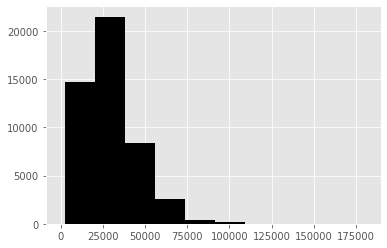

In [236]:
plt.figure()
data_client['AMT_ANNUITY'].hist(color='black')
data_client[j]['AMT_ANNUITY'].hist(color='red')
plt.show()